<a href="https://colab.research.google.com/github/envirodatascience/final-project-wildfire/blob/main/Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfires in the United States

This project examines the landscape of wildfires in the US from 1984-2024. We aim to answer the following questions using data from the US Geological Service that monitors trends in burn severity over this time period:

1) How has wildfire frequency changed over time in the US?

2) How has wildfire severity changed over time in the US?

3) Is prescribed burning an effective policy for mitigating fires?

4) How are individual states experiencing change in wildfire occurence?

First We Prepare our Data

In [81]:
# import standard packages
import pandas as pd
import numpy as np

#import plotting packages
import geopandas as gpd
from plotnine import *
import plotnine

#import stats packages
import scipy.stats as stats
import statsmodels.api as sm

#import animation packages
import matplotlib.pyplot as plt
import io
import os
from PIL import Image as PILImage
from IPython.display import display, Image
import imageio

#import image alteration package
import cv2

# Upload Data
We are pulling data from The Monitoring Trends in Burn Severity (MTBS) Program provided by the USGS and USDA Forest Service

The data provides info regarding all currently inventoried fires occurring between calendar year 1984 and 2024 for CONUS, Alaska, Hawaii, and Puerto Rico.

In [2]:
! wget https://www.dropbox.com/scl/fi/1npahfadgns4vhx1tov6z/mtbs_perims_DD.zip?rlkey=co5pe3dme8j5262smjik8ve9c&st=f2hgmw9k&dl=1

--2025-04-28 14:18:25--  https://www.dropbox.com/scl/fi/1npahfadgns4vhx1tov6z/mtbs_perims_DD.zip?rlkey=co5pe3dme8j5262smjik8ve9c
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f9209cf7b4e9fae267df139a2.dl.dropboxusercontent.com/cd/0/inline/Coob_14_dUIibbaED84NKl65nl4D6FxyOJVR59SmgbMr7w1ifKNFA_XkL6BLg3c6d09yxtTxlR4txViYCGw0CY3zq3VQPuN43RrUk2PKZDOoqFL0NzsIQLSPLkT5Mpq8NDCS_3DT9-kvDUG2cu33CmM0/file# [following]
--2025-04-28 14:18:25--  https://uc8f9209cf7b4e9fae267df139a2.dl.dropboxusercontent.com/cd/0/inline/Coob_14_dUIibbaED84NKl65nl4D6FxyOJVR59SmgbMr7w1ifKNFA_XkL6BLg3c6d09yxtTxlR4txViYCGw0CY3zq3VQPuN43RrUk2PKZDOoqFL0NzsIQLSPLkT5Mpq8NDCS_3DT9-kvDUG2cu33CmM0/file
Resolving uc8f9209cf7b4e9fae267df139a2.dl.dropboxusercontent.com (uc8f9209cf7b4e9fae267df139a2.dl.dropboxusercontent.com)... 162.125.1.15, 

In [3]:
#upload fire severity data
! unzip mtbs_perims_DD.zip?rlkey=co5pe3dme8j5262smjik8ve9c #unpacks zipped folder


Archive:  mtbs_perims_DD.zip?rlkey=co5pe3dme8j5262smjik8ve9c
  inflating: mtbs_perims_DD.cpg      
  inflating: mtbs_perims_DD.dbf      
  inflating: mtbs_perims_DD.prj      
  inflating: mtbs_perims_DD.sbn      
  inflating: mtbs_perims_DD.sbx      
  inflating: mtbs_perims_DD.shp      
  inflating: mtbs_perims_DD.shp.xml  
  inflating: mtbs_perims_DD.shx      
  inflating: mtbs_perims_DD_ISO_metadata.xml  
  inflating: mtbs_perims_DD_metadata.xml  


In [4]:
#read in shape file
shape = "mtbs_perims_DD.shp"
df = gpd.read_file(shape)

In [5]:
df.head()

Event_ID irwinID Incid_Name Incid_Type  Map_ID Map_Prog  \
0  AK6260315742119850801    None  CAMELBACK   Wildfire    4737     MTBS   
1  AK6256215664519850720    None  SUGARLOAF   Wildfire    4738     MTBS   
2  AK6547615382919850801    None  TAL NW 44   Wildfire    4739     MTBS   
3  AK6521015526519850803    None  GAL NE 48   Wildfire    4740     MTBS   
4  AZ3178311066219850302    None    UNNAMED   Wildfire    4741     MTBS   

  Asmnt_Type  BurnBndAc BurnBndLat BurnBndLon  ... Perim_ID dNBR_offst  \
0   Extended       4780     62.603   -157.421  ...     None         27   
1   Extended       5489     62.562   -156.645  ...     None          3   
2   Extended       1491     65.476   -153.829  ...     None         14   
3   Extended       1298     65.210   -155.265  ...     None         14   
4    Initial       1326     31.783   -110.662  ...     None        -10   

  dNBR_stdDv NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
0      -9999     -970        -150    130    334     585   
1      -9999     -970        -150     70    320     600   
2      -9999     -970        -150     50    275     530   
3      -9999     -970        -150    100    321     580   
4      -9999     -970        -150     25    152     320   

                            Comment  \
0                              None   
1                              None   
2                              None   
3                              None   
4  Hard to delineate fire perimeter   

                                            geometry  
0  POLYGON ((-157.44988 62.62182, -157.44895 62.6...  
1  POLYGON ((-156.69736 62.57441, -156.70027 62.5...  
2  POLYGON ((-153.84454 65.46265, -153.84574 65.4...  
3  POLYGON ((-155.27031 65.22507, -155.26915 65.2...  
4  POLYGON ((-110.6733 31.75345, -110.67378 31.75...  

[5 rows x 23 columns]

#Orienting and Data Cleaning

In [6]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30331 entries, 0 to 30330
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Event_ID    30331 non-null  object        
 1   irwinID     6264 non-null   object        
 2   Incid_Name  30331 non-null  object        
 3   Incid_Type  30331 non-null  object        
 4   Map_ID      30331 non-null  int64         
 5   Map_Prog    30331 non-null  object        
 6   Asmnt_Type  30331 non-null  object        
 7   BurnBndAc   30331 non-null  int64         
 8   BurnBndLat  30331 non-null  object        
 9   BurnBndLon  30331 non-null  object        
 10  Ig_Date     30331 non-null  datetime64[ms]
 11  Pre_ID      22056 non-null  object        
 12  Post_ID     30331 non-null  object        
 13  Perim_ID    2878 non-null   object        
 14  dNBR_offst  30331 non-null  int64         
 15  dNBR_stdDv  30331 non-null  int64         
 16  NoData_T    30

In [7]:
#create state column from event ID
df['State'] = df['Event_ID'].str[:2]
df['State'].unique()

array(['AK', 'AZ', 'SD', 'CA', 'WA', 'OR', 'FL', 'NV', 'CO', 'ID', 'NM',
       'UT', 'WY', 'MT', 'NE', 'AL', 'GA', 'NC', 'SC', 'LA', 'ME', 'MI',
       'MN', 'NJ', 'VA', 'NY', 'AR', 'DE', 'MS', 'ND', 'TX', 'KY', 'TN',
       'WI', 'MO', 'WV', 'MD', 'KS', 'OK', 'IN', 'IA', 'HI', 'OH', 'MA',
       'PA', 'PR', 'IL'], dtype=object)

In [8]:
#move state column to front
df_state = df.pop('State')
df.insert(0,'State',df_state)
df.head()

State               Event_ID irwinID Incid_Name Incid_Type  Map_ID Map_Prog  \
0    AK  AK6260315742119850801    None  CAMELBACK   Wildfire    4737     MTBS   
1    AK  AK6256215664519850720    None  SUGARLOAF   Wildfire    4738     MTBS   
2    AK  AK6547615382919850801    None  TAL NW 44   Wildfire    4739     MTBS   
3    AK  AK6521015526519850803    None  GAL NE 48   Wildfire    4740     MTBS   
4    AZ  AZ3178311066219850302    None    UNNAMED   Wildfire    4741     MTBS   

  Asmnt_Type  BurnBndAc BurnBndLat  ... Perim_ID dNBR_offst dNBR_stdDv  \
0   Extended       4780     62.603  ...     None         27      -9999   
1   Extended       5489     62.562  ...     None          3      -9999   
2   Extended       1491     65.476  ...     None         14      -9999   
3   Extended       1298     65.210  ...     None         14      -9999   
4    Initial       1326     31.783  ...     None        -10      -9999   

  NoData_T IncGreen_T  Low_T  Mod_T  High_T                           Comment  \
0     -970       -150    130    334     585                              None   
1     -970       -150     70    320     600                              None   
2     -970       -150     50    275     530                              None   
3     -970       -150    100    321     580                              None   
4     -970       -150     25    152     320  Hard to delineate fire perimeter   

                                            geometry  
0  POLYGON ((-157.44988 62.62182, -157.44895 62.6...  
1  POLYGON ((-156.69736 62.57441, -156.70027 62.5...  
2  POLYGON ((-153.84454 65.46265, -153.84574 65.4...  
3  POLYGON ((-155.27031 65.22507, -155.26915 65.2...  
4  POLYGON ((-110.6733 31.75345, -110.67378 31.75...  

[5 rows x 24 columns]

In [9]:
#add year column
df['Year'] = df['Ig_Date'].dt.year
df.head()

State               Event_ID irwinID Incid_Name Incid_Type  Map_ID Map_Prog  \
0    AK  AK6260315742119850801    None  CAMELBACK   Wildfire    4737     MTBS   
1    AK  AK6256215664519850720    None  SUGARLOAF   Wildfire    4738     MTBS   
2    AK  AK6547615382919850801    None  TAL NW 44   Wildfire    4739     MTBS   
3    AK  AK6521015526519850803    None  GAL NE 48   Wildfire    4740     MTBS   
4    AZ  AZ3178311066219850302    None    UNNAMED   Wildfire    4741     MTBS   

  Asmnt_Type  BurnBndAc BurnBndLat  ... dNBR_offst dNBR_stdDv NoData_T  \
0   Extended       4780     62.603  ...         27      -9999     -970   
1   Extended       5489     62.562  ...          3      -9999     -970   
2   Extended       1491     65.476  ...         14      -9999     -970   
3   Extended       1298     65.210  ...         14      -9999     -970   
4    Initial       1326     31.783  ...        -10      -9999     -970   

  IncGreen_T Low_T  Mod_T  High_T                           Comment  \
0       -150   130    334     585                              None   
1       -150    70    320     600                              None   
2       -150    50    275     530                              None   
3       -150   100    321     580                              None   
4       -150    25    152     320  Hard to delineate fire perimeter   

                                            geometry  Year  
0  POLYGON ((-157.44988 62.62182, -157.44895 62.6...  1985  
1  POLYGON ((-156.69736 62.57441, -156.70027 62.5...  1985  
2  POLYGON ((-153.84454 65.46265, -153.84574 65.4...  1985  
3  POLYGON ((-155.27031 65.22507, -155.26915 65.2...  1985  
4  POLYGON ((-110.6733 31.75345, -110.67378 31.75...  1985  

[5 rows x 25 columns]

In [10]:
# filter out columns not needed in analysis
df_columns = df.drop(columns=['Event_ID', 'irwinID', 'Map_ID', 'Map_Prog', 'Asmnt_Type', 'Pre_ID', 'Post_ID', 'Perim_ID', 'Comment', 'dNBR_stdDv'])
df_columns.head()

State Incid_Name Incid_Type  BurnBndAc BurnBndLat BurnBndLon    Ig_Date  \
0    AK  CAMELBACK   Wildfire       4780     62.603   -157.421 1985-08-01   
1    AK  SUGARLOAF   Wildfire       5489     62.562   -156.645 1985-07-20   
2    AK  TAL NW 44   Wildfire       1491     65.476   -153.829 1985-08-01   
3    AK  GAL NE 48   Wildfire       1298     65.210   -155.265 1985-08-03   
4    AZ    UNNAMED   Wildfire       1326     31.783   -110.662 1985-03-02   

   dNBR_offst  NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
0          27      -970        -150    130    334     585   
1           3      -970        -150     70    320     600   
2          14      -970        -150     50    275     530   
3          14      -970        -150    100    321     580   
4         -10      -970        -150     25    152     320   

                                            geometry  Year  
0  POLYGON ((-157.44988 62.62182, -157.44895 62.6...  1985  
1  POLYGON ((-156.69736 62.57441, -156.70027 62.5...  1985  
2  POLYGON ((-153.84454 65.46265, -153.84574 65.4...  1985  
3  POLYGON ((-155.27031 65.22507, -155.26915 65.2...  1985  
4  POLYGON ((-110.6733 31.75345, -110.67378 31.75...  1985

In [11]:
df_columns.describe()

BurnBndAc                     Ig_Date    dNBR_offst      NoData_T  \
count  3.033100e+04                       30331  30331.000000  30331.000000   
mean   7.076553e+03  2006-12-30 03:19:58.180000  -2671.706373   2022.287627   
min    5.000000e+02         1984-01-26 00:00:00  -9999.000000  -1070.000000   
25%    1.137500e+03         1999-08-30 00:00:00  -9999.000000   -970.000000   
50%    1.881000e+03         2008-03-15 00:00:00    -10.000000   -970.000000   
75%    4.097500e+03         2015-09-09 00:00:00     18.000000   9999.000000   
max    1.068802e+06         2024-10-09 00:00:00    373.000000   9999.000000   
std    2.618539e+04                         NaN   4429.035348   4885.577822   

         IncGreen_T         Low_T         Mod_T        High_T          Year  
count  30331.000000  30331.000000  30331.000000  30331.000000  30331.000000  
mean    2617.766839    131.472421    538.656391   1686.235798   2006.574099  
min     -500.000000  -9999.000000  -9999.000000  -9999.000000   1984.000000  
25%     -150.000000     40.000000     90.000000   -588.000000   1999.000000  
50%     -150.000000     70.000000    290.000000    580.000000   2008.000000  
75%     9999.000000    150.000000    450.000000   9999.000000   2015.000000  
max     9999.000000    785.000000  99999.000000   9999.000000   2024.000000  
std     4520.870737    273.590021   6480.445412   7904.206097     10.701418

In [12]:
# Replace -9999 with np.nan in the specific column
df_columns['dNBR_offst'] = df_columns['dNBR_offst'].replace(-9999, np.nan)
df_columns.describe()

BurnBndAc                     Ig_Date    dNBR_offst      NoData_T  \
count  3.033100e+04                       30331  22215.000000  30331.000000   
mean   7.076553e+03  2006-12-30 03:19:58.180000      5.237812   2022.287627   
min    5.000000e+02         1984-01-26 00:00:00   -210.000000  -1070.000000   
25%    1.137500e+03         1999-08-30 00:00:00    -16.000000   -970.000000   
50%    1.881000e+03         2008-03-15 00:00:00      5.000000   -970.000000   
75%    4.097500e+03         2015-09-09 00:00:00     27.000000   9999.000000   
max    1.068802e+06         2024-10-09 00:00:00    373.000000   9999.000000   
std    2.618539e+04                         NaN     36.040325   4885.577822   

         IncGreen_T         Low_T         Mod_T        High_T          Year  
count  30331.000000  30331.000000  30331.000000  30331.000000  30331.000000  
mean    2617.766839    131.472421    538.656391   1686.235798   2006.574099  
min     -500.000000  -9999.000000  -9999.000000  -9999.000000   1984.000000  
25%     -150.000000     40.000000     90.000000   -588.000000   1999.000000  
50%     -150.000000     70.000000    290.000000    580.000000   2008.000000  
75%     9999.000000    150.000000    450.000000   9999.000000   2015.000000  
max     9999.000000    785.000000  99999.000000   9999.000000   2024.000000  
std     4520.870737    273.590021   6480.445412   7904.206097     10.701418

#Wildfire Dynamics over Time

We want to investigate how fire size, severity, and frequency change over time.

In [13]:
# filter for wildfires
df_wildfires = df_columns[df_columns['Incid_Type'] == 'Wildfire']

In [14]:
# bucket by year
df_wildfires['Ig_Date'] = pd.to_datetime(df_wildfires['Ig_Date'])
df_wildfires['Year'] = df_wildfires['Ig_Date'].dt.year
df_wildfires_years = df_wildfires.pivot_table(index = 'Year', values = 'Incid_Type', aggfunc = 'count')
df_wildfires_years = df_wildfires_years.rename(columns = {'Incid_Type': 'Wildfires'})
df_wildfires_years = df_wildfires_years.reset_index()
df_wildfires_years.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Year  Wildfires
0  1984        188
1  1985        417
2  1986        281
3  1987        413
4  1988        400

Wildfire Frequency over Time

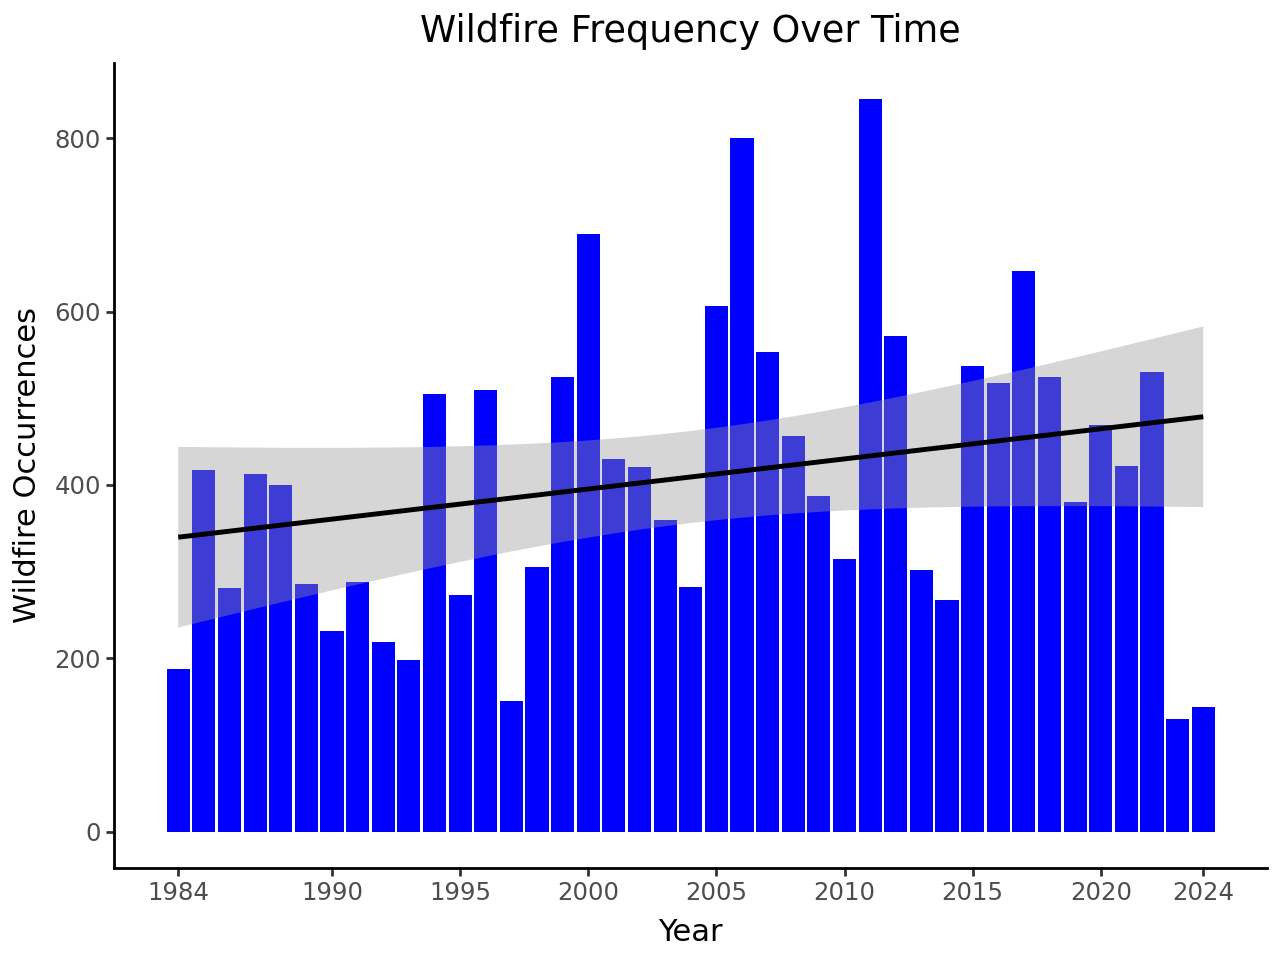

In [15]:
# fire frequency over time
(
    ggplot(df_wildfires_years, aes(x = 'Year', y='Wildfires'))
       + geom_bar(stat = 'identity', fill = 'blue')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Wildfire Occurrences")
       + ggtitle("Wildfire Frequency Over Time")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + theme_classic()

)

In [16]:
# year of highest fire frequency
df_wildfires_years.sort_values(by = 'Wildfires', ascending = False).head(1)

Year  Wildfires
27  2011        845

The graph shows that the frequency of fires has trended upward over time, with a peak in 2011.

Wildfire Size over Time

In [17]:
# aggregate burned acres per year
df_wildfires_acres = df_wildfires.pivot_table(index = 'Year', values = 'BurnBndAc', aggfunc = 'sum')
df_wildfires_acres['BurnBndAc'] = df_wildfires_acres['BurnBndAc'].astype(int)
df_wildfires_acres['BurnBndAc'] = df_wildfires_acres['BurnBndAc'] / 1000000
df_wildfires_acres = df_wildfires_acres.reset_index()
df_wildfires_acres.head()

Year  BurnBndAc
0  1984   1.239015
1  1985   3.198033
2  1986   1.824537
3  1987   2.290434
4  1988   4.627236

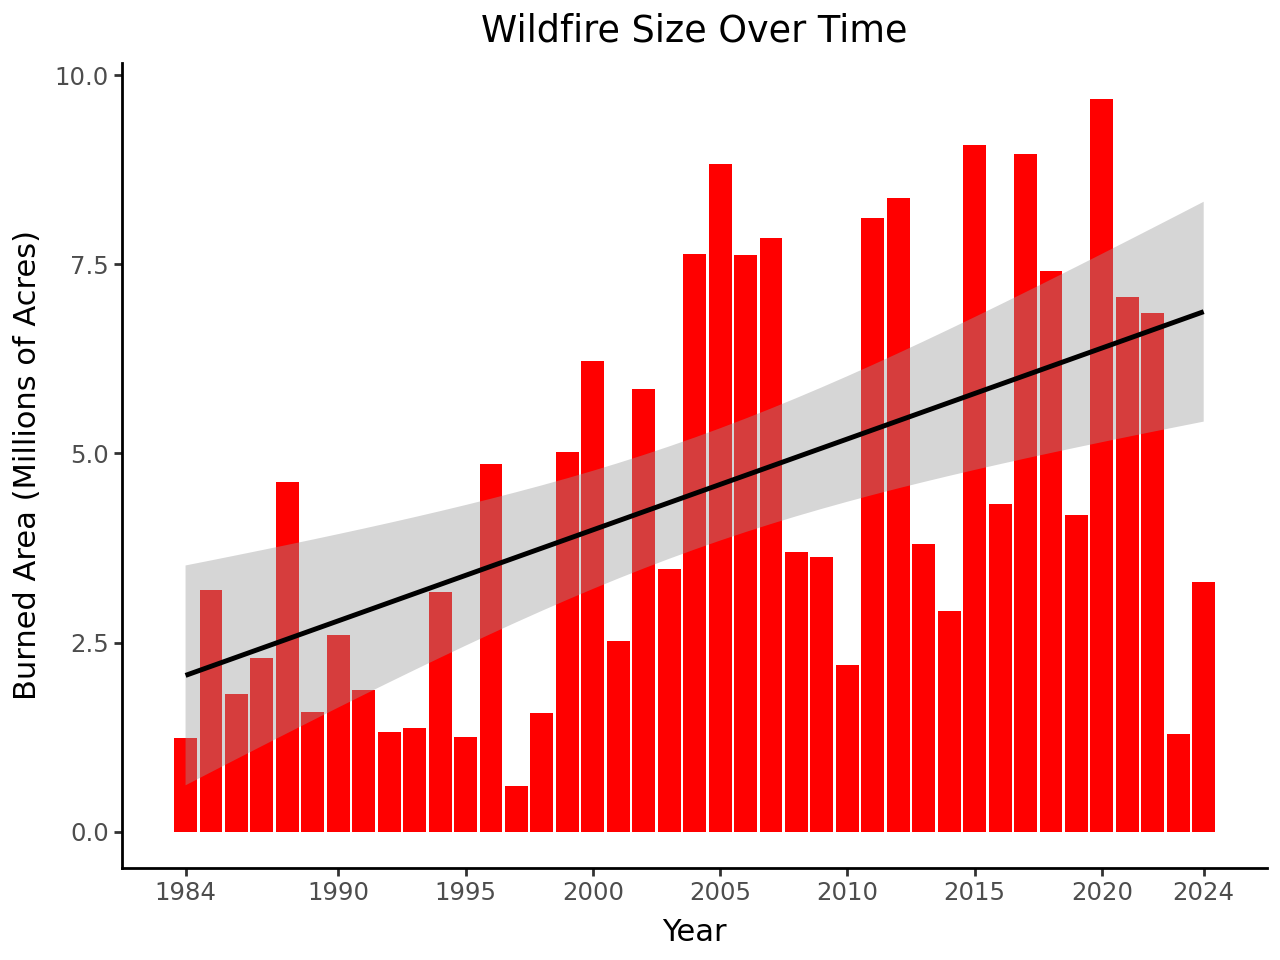

In [18]:
# fire size over time
(
    ggplot(df_wildfires_acres, aes(x = 'Year', y='BurnBndAc'))
       + geom_bar(stat = 'identity', fill = 'red')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Burned Area (Millions of Acres)")
       + ggtitle("Wildfire Size Over Time")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + scale_y_continuous()
       + theme_classic()
)

In [19]:
# check year of worst fires by acres burned
df_wildfires_acres.sort_values(by = 'BurnBndAc', ascending = False).head(1)

Year  BurnBndAc
36  2020    9.68503

As the graph shows, the acres burned by wildfires has increased over time, with 2020 as the worst year for land affected by wildfires.  

# Wildfire Severity over Time

We measure wildfire severity by dNBR.

In [20]:
#check dNBR details
df_wildfires['dNBR_offst'].describe()

count    14088.000000
mean         6.195840
std         37.614745
min       -210.000000
25%        -16.000000
50%          5.000000
75%         28.000000
max        306.000000
Name: dNBR_offst, dtype: float64

In [21]:
# aggregate dNBR per year
df_wildfires_dNBR = df_wildfires.pivot_table(index = 'Year', values = 'dNBR_offst', aggfunc = 'mean')
df_wildfires_dNBR = df_wildfires_dNBR.reset_index()
df_wildfires_dNBR.head()

Year  dNBR_offst
0  1984    8.431579
1  1985   13.332344
2  1986    7.322176
3  1987   26.000000
4  1988    9.522152

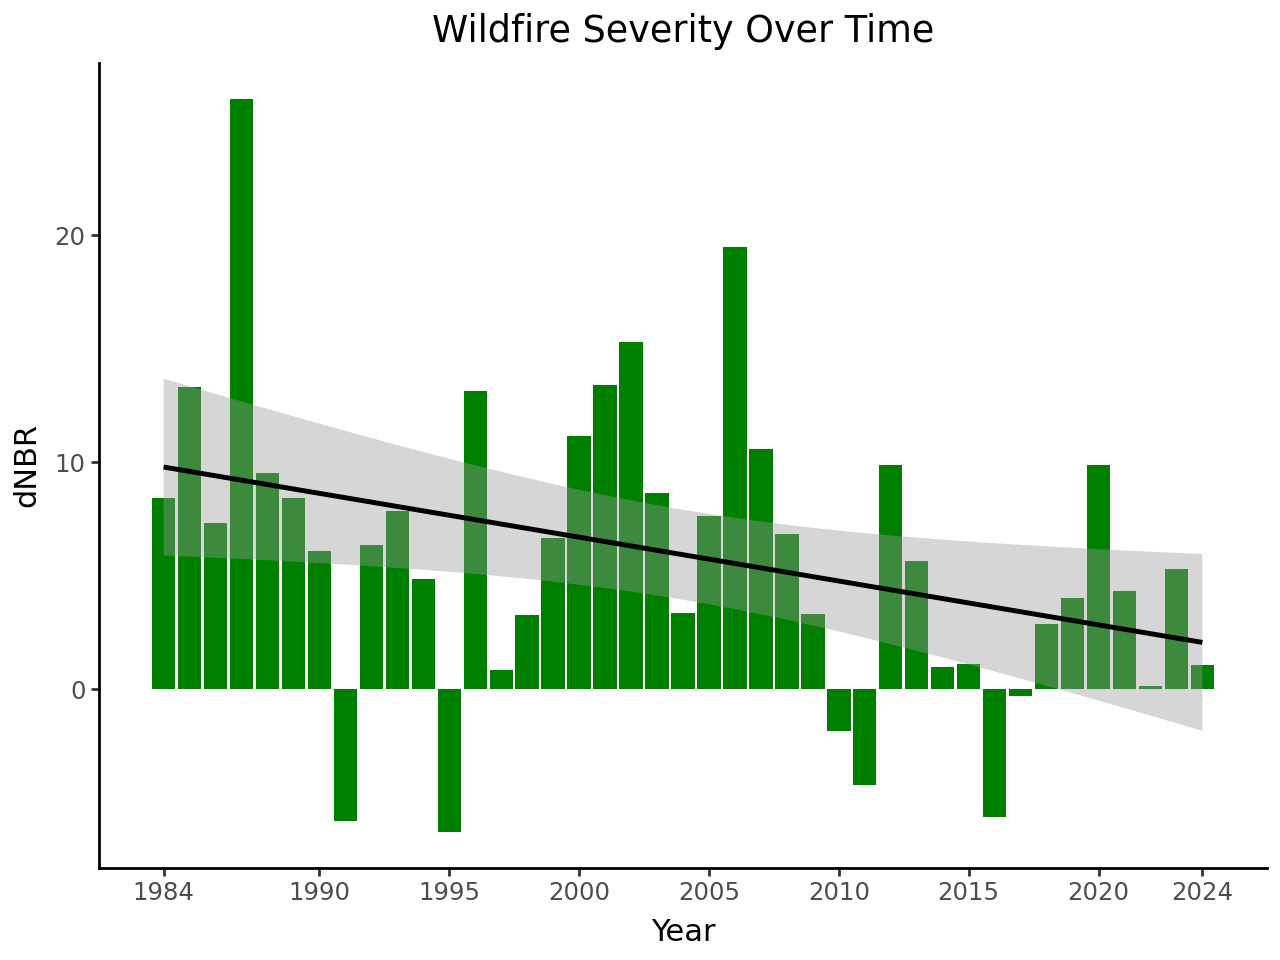

In [22]:
# dNBR over time
(
    ggplot(df_wildfires_dNBR, aes(x = 'Year', y='dNBR_offst'))
    + geom_bar(stat = 'identity', fill = 'green')
    + geom_smooth(method='lm')
    + theme_classic()
    + xlab("Year")
    + ylab("dNBR")
    + ggtitle("Wildfire Severity Over Time")
    + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
)

#Prescribed Burns vs Wildfires over Time

How does the occurrence of prescribed burns relate to wildfires?

In [23]:
# check potential incident types
df_columns['Incid_Type'].unique()

array(['Wildfire', 'Prescribed Fire', 'Unknown', 'Wildland Fire Use'],
      dtype=object)

In [24]:
# filter for prescribed burns
df_prescribed = df_columns[df_columns['Incid_Type'] == 'Prescribed Fire']
df_prescribed.head()

State      Incid_Name       Incid_Type  BurnBndAc BurnBndLat BurnBndLon  \
192    CA     BEAR MTN. 4  Prescribed Fire       1473     38.156   -120.739   
193    CA  BLUE MTN. WEST  Prescribed Fire       4627     40.564   -121.969   
360    NJ         UNNAMED  Prescribed Fire        761     39.631    -74.410   
361    NJ         UNNAMED  Prescribed Fire        768     39.914    -74.467   
362    NJ         UNNAMED  Prescribed Fire       1685     39.774    -74.784   

       Ig_Date  dNBR_offst  NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
192 1985-09-17        18.0      -970        -150    100    264     475   
193 1985-08-27       -11.0      -970        -150     40   9999    9999   
360 1985-03-08         NaN      9999        9999    250     20   -9999   
361 1985-03-01         NaN      9999        9999    275  -9999   -9999   
362 1985-03-01         NaN      9999        9999    225  -9999   -9999   

                                              geometry  Year  
192  POLYGON ((-120.76035 38.17445, -120.7603 38.17...  1985  
193  POLYGON ((-121.9987 40.55225, -121.99769 40.55...  1985  
360  POLYGON ((-74.40977 39.6343, -74.41001 39.6341...  1985  
361  MULTIPOLYGON (((-74.44289 39.91073, -74.44268 ...  1985  
362  POLYGON ((-74.79944 39.77788, -74.80007 39.778...  1985

In [25]:
# prescribed fires by year

df_prescribed['Ig_Date'] = pd.to_datetime(df_prescribed['Ig_Date'])
df_prescribed['Year'] = df_prescribed['Ig_Date'].dt.year
df_prescribed_years = df_prescribed.pivot_table(index = 'Year', values = 'Incid_Type', aggfunc = 'count')
df_prescribed_years = df_prescribed_years.rename(columns = {'Incid_Type': 'Prescribed Fires'})
df_prescribed_years = df_prescribed_years.reset_index()
df_prescribed_years.head()


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Year  Prescribed Fires
0  1984                11
1  1985                 8
2  1986                19
3  1987                 7
4  1988                12

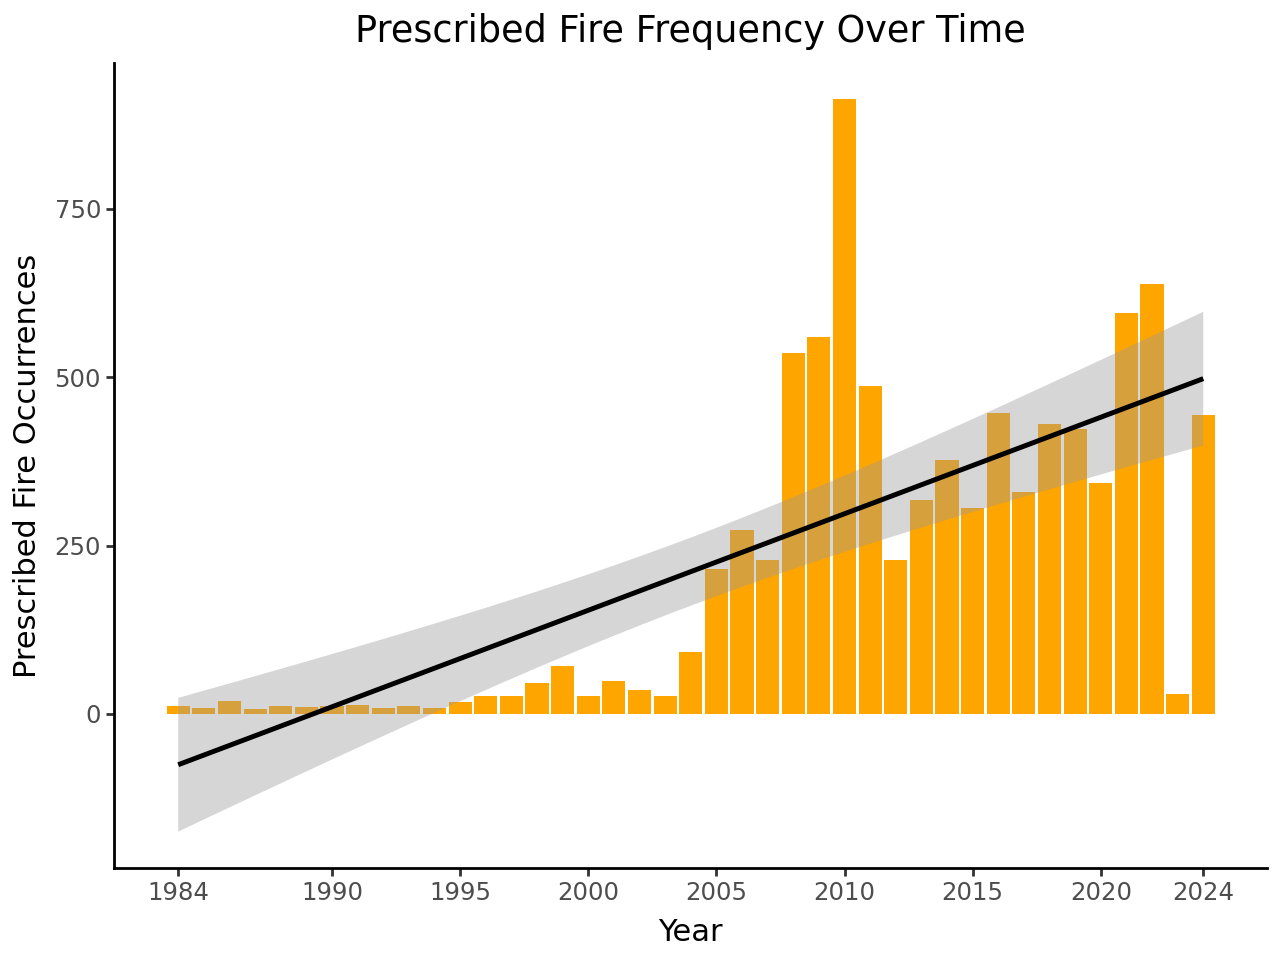

In [26]:
# prescribed fire count over time
(
    ggplot(df_prescribed_years, aes(x = 'Year', y='Prescribed Fires'))
       + geom_bar(stat = 'identity', fill = 'orange')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Prescribed Fire Occurrences")
       + ggtitle("Prescribed Fire Frequency Over Time")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + theme_classic()
)

Now we want to look at how prescribed and wildfire trends relate over time.

In [27]:
#merge frequency dataframes
df_freq_merged = pd.merge(df_wildfires_years, df_prescribed_years, on = 'Year')
df_freq_merged.head()

Year  Wildfires  Prescribed Fires
0  1984        188                11
1  1985        417                 8
2  1986        281                19
3  1987        413                 7
4  1988        400                12

In [28]:
# melt frequency
df_freq_melted = pd.melt(df_freq_merged, id_vars=['Year'], value_vars=['Wildfires', 'Prescribed Fires'], var_name='series', value_name='value')
df_freq_melted.head()

Year     series  value
0  1984  Wildfires    188
1  1985  Wildfires    417
2  1986  Wildfires    281
3  1987  Wildfires    413
4  1988  Wildfires    400

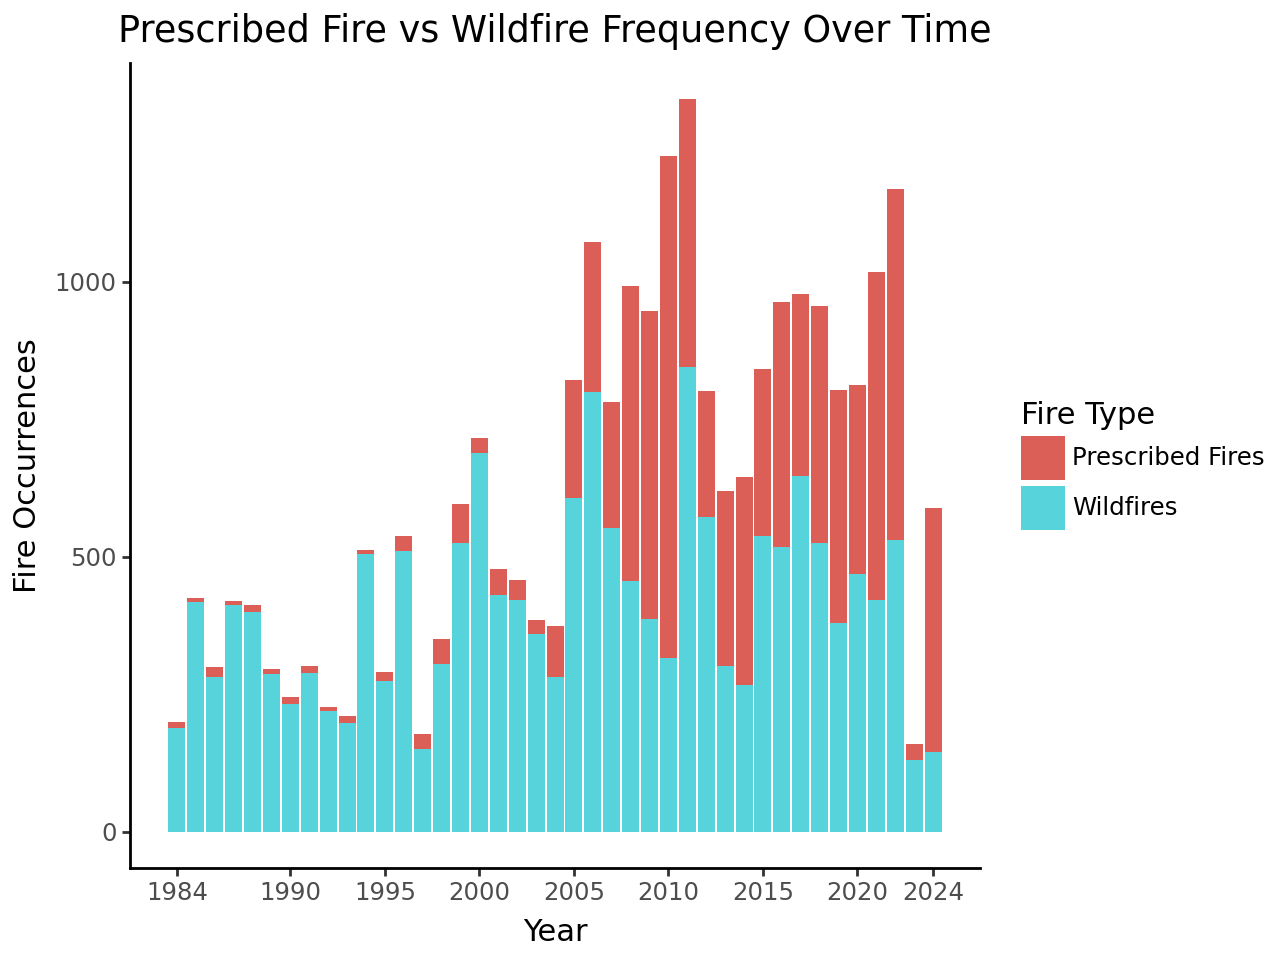

In [29]:
# graph stacked bar chart of prescribed vs wildfires over time
(
    ggplot(df_freq_melted, aes(x = 'Year', y = 'value', fill = 'series'))
    + geom_bar(stat = 'identity')
    + xlab("Year")
    + ylab("Fire Occurrences")
    + labs(fill = 'Fire Type')
    + ggtitle("Prescribed Fire vs Wildfire Frequency Over Time")
    + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
    + theme_classic()
)


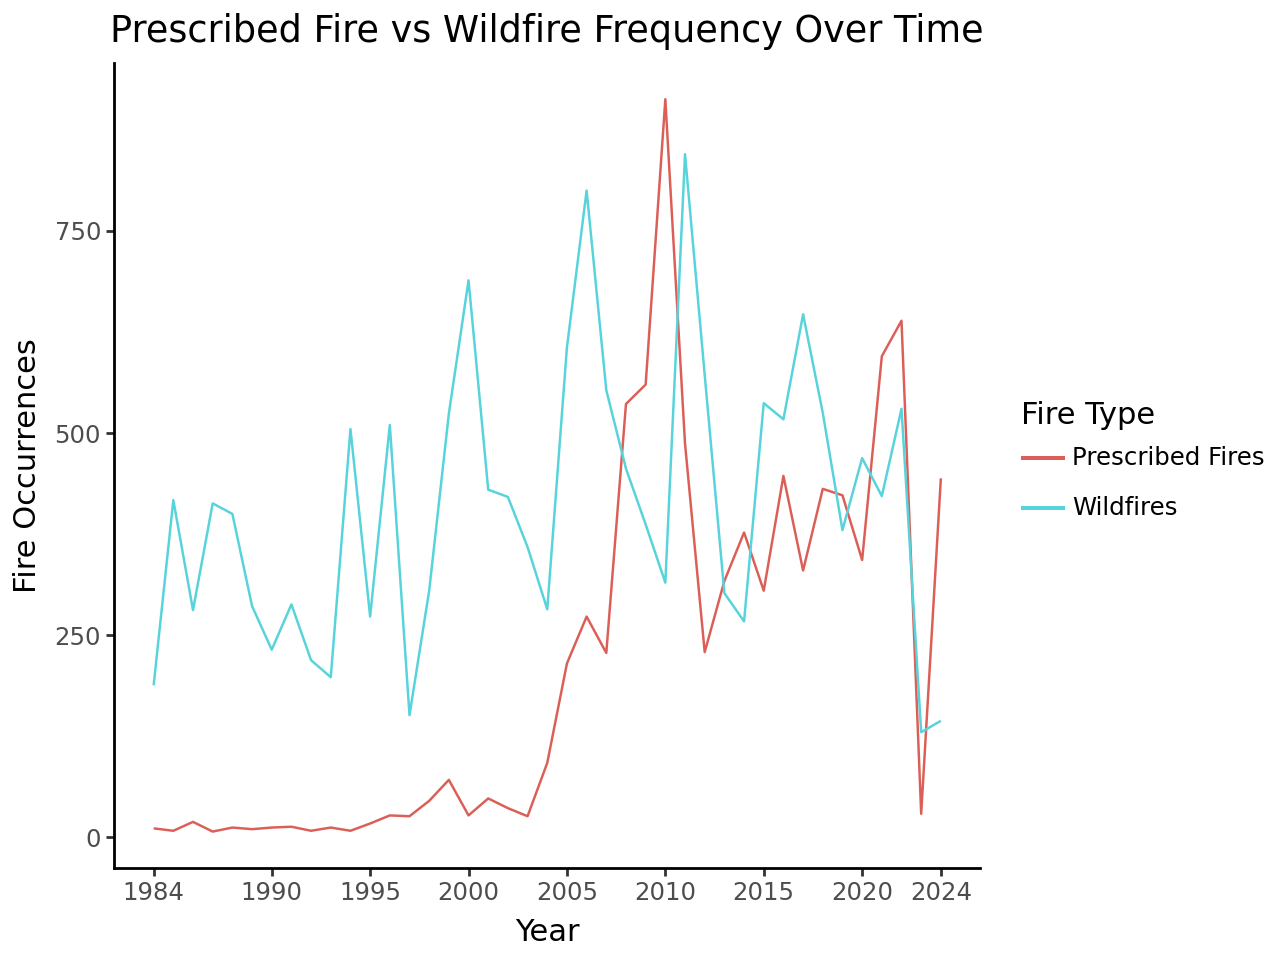

In [30]:
# line graph of prescribed vs wildfire frequency over time
(
    ggplot(df_freq_melted, aes(x = 'Year', y = 'value', color = 'series'))
    + geom_line()
    + xlab("Year")
    + ylab("Fire Occurrences")
    + labs(color = 'Fire Type')
    + ggtitle("Prescribed Fire vs Wildfire Frequency Over Time")
    + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
    + theme_classic()
)

In [31]:
# prescribed fires burn area
df_prescribed_acres = df_prescribed.pivot_table(index = 'Year', values = 'BurnBndAc', aggfunc = 'sum')
df_prescribed_acres['BurnBndAc'] = df_prescribed_acres['BurnBndAc'] / 1000000
df_prescribed_acres = df_prescribed_acres.reset_index()
df_prescribed_acres.head()

Year  BurnBndAc
0  1984   0.020773
1  1985   0.024421
2  1986   0.031982
3  1987   0.010226
4  1988   0.016283

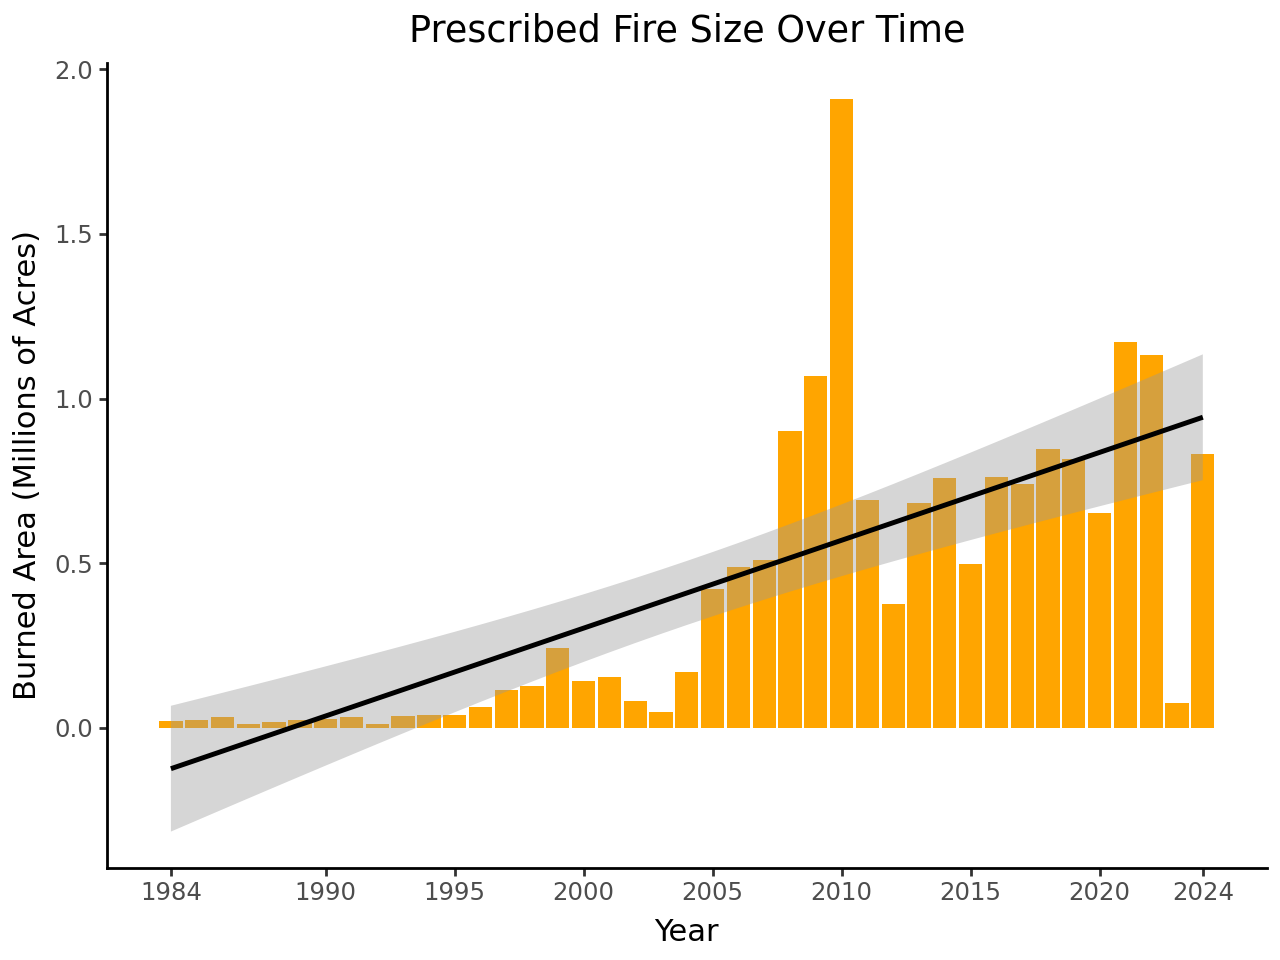

In [32]:
# prescribed fires acres burned over time
(
    ggplot(df_prescribed_acres, aes(x = 'Year', y='BurnBndAc'))
    + geom_bar(stat = 'identity', fill = 'orange')
    + geom_smooth(method='lm')
    + xlab("Year")
    + ylab("Burned Area (Millions of Acres)")
    + ggtitle("Prescribed Fire Size Over Time")
    + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
    + scale_y_continuous()
    + theme_classic()
)

In [33]:
# merge acres
df_acres_merged = pd.merge(df_wildfires_acres, df_prescribed_acres, on = 'Year')
df_acres_merged = df_acres_merged.rename(columns = {'BurnBndAc_x': 'Wildfires', 'BurnBndAc_y': 'Prescribed Fires'})
df_acres_merged.head()

Year  Wildfires  Prescribed Fires
0  1984   1.239015          0.020773
1  1985   3.198033          0.024421
2  1986   1.824537          0.031982
3  1987   2.290434          0.010226
4  1988   4.627236          0.016283

In [34]:
# melt acres
df_acres_melted = pd.melt(df_acres_merged, id_vars=['Year'], value_vars=['Wildfires', 'Prescribed Fires'], var_name='series', value_name='value')
df_acres_melted.head()

Year     series     value
0  1984  Wildfires  1.239015
1  1985  Wildfires  3.198033
2  1986  Wildfires  1.824537
3  1987  Wildfires  2.290434
4  1988  Wildfires  4.627236

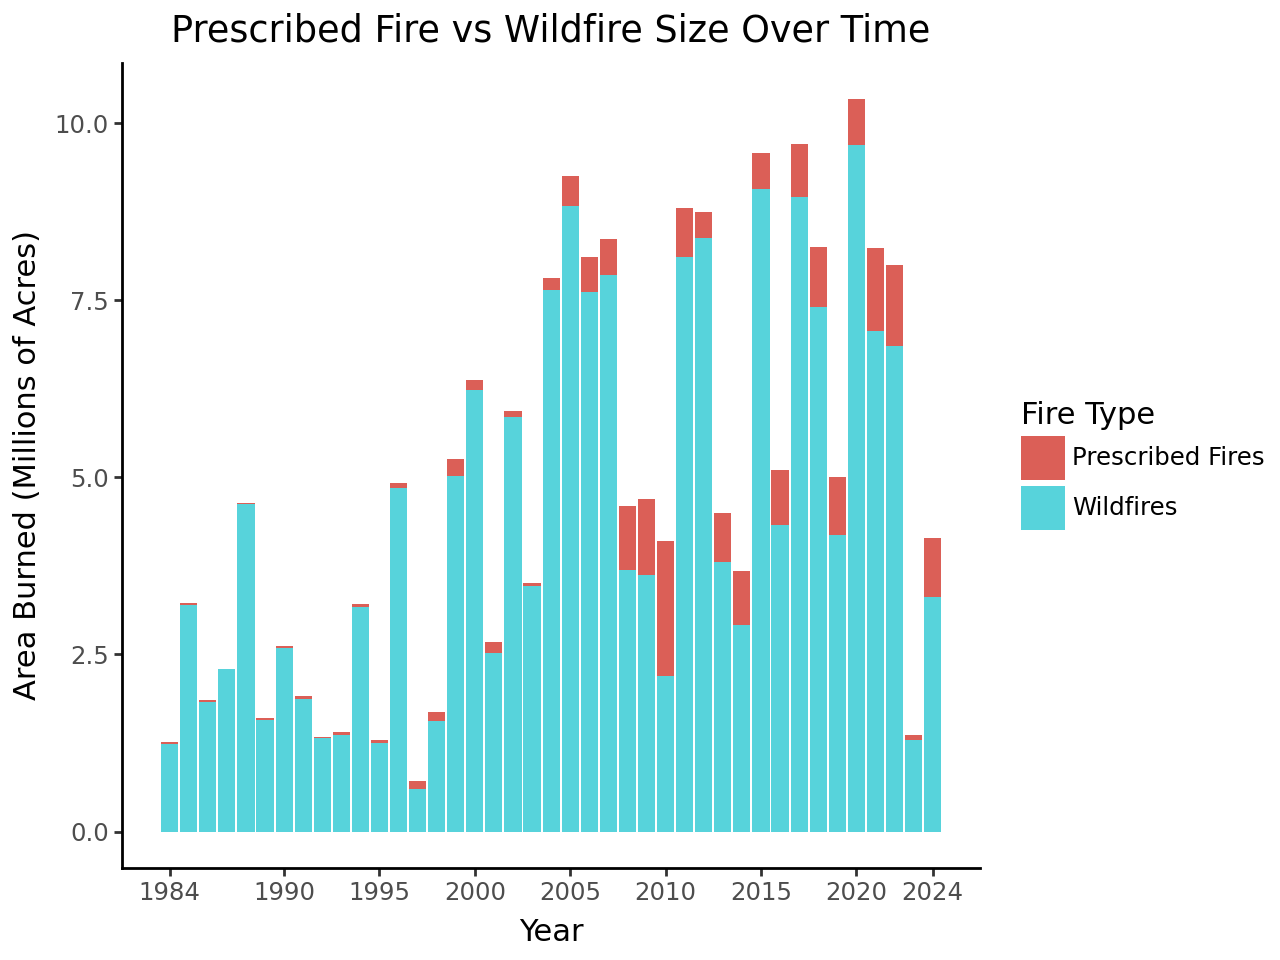

In [35]:
# prescribed acres burned vs wildfire acres burned over time
(
    ggplot(df_acres_melted, aes(x = 'Year', y = 'value', fill = 'series'))
    + geom_bar(stat = 'identity')
    + xlab("Year")
    + ylab("Area Burned (Millions of Acres)")
    + labs(fill = 'Fire Type')
    + ggtitle("Prescribed Fire vs Wildfire Size Over Time")
    + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
    + theme_classic()
)


### State Analysis
We will take a deeper look into the three states that had the most fires during the study period.

Check state wildfire frequency

In [36]:
# check which state has had the most wildfires in since 1984
df_wildfires['State'].value_counts().head(10).reset_index()

State  count
0    CA   1809
1    ID   1552
2    AK   1373
3    TX   1076
4    NV   1009
5    OR    958
6    AZ    910
7    MT    890
8    FL    870
9    NM    868

In [37]:
#check average burn size for each state
df_wildfires.groupby('State')['BurnBndAc'].mean().sort_values(ascending=False).head(10).reset_index()

State     BurnBndAc
0    AK  28154.661326
1    OR  14258.705637
2    CA  13773.393035
3    WA  13107.172920
4    NV  12998.059465
5    GA  12946.152542
6    WY  12480.064516
7    ID  11836.476804
8    MT  10658.696629
9    NE   9120.401709

California, Alaska, and Nevada are the only three states that are in the top 5 for most wildfires and average burn size. We will zoom in on these states for more detailed analysis

In [77]:
#load in state boundary data for individual analysis
! wget https://github.com/envirodatascience/final-project-wildfire/raw/main/cb_2018_us_state_500k.zip

--2025-04-28 14:51:52--  https://github.com/envirodatascience/final-project-wildfire/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/final-project-wildfire/main/cb_2018_us_state_500k.zip [following]
--2025-04-28 14:51:53--  https://raw.githubusercontent.com/envirodatascience/final-project-wildfire/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip.1’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.05s   

2025-04-28 14:5

In [39]:
! unzip cb_2018_us_state_500k.zip

Archive:  cb_2018_us_state_500k.zip
  inflating: cb_2018_us_state_500k.shp.ea.iso.xml  
  inflating: cb_2018_us_state_500k.shp.iso.xml  
  inflating: cb_2018_us_state_500k.shp  
  inflating: cb_2018_us_state_500k.shx  
  inflating: cb_2018_us_state_500k.dbf  
  inflating: cb_2018_us_state_500k.prj  
 extracting: cb_2018_us_state_500k.cpg  


In [40]:
shp = "cb_2018_us_state_500k.shp"
df_states = gpd.read_file(shp) # reads in shape file
df_states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.6432 38.16909, -82.643 38.16956,...

In [41]:
#Set CRS for states
df_states = df_states.to_crs(epsg=4269)

# California

We will begin by looking at fire size and frequency changes specifically in California

California Wildfire Map

In [42]:
#call california boundary
california = df_states[df_states['NAME'] == 'California']

In [43]:
#Zoom in on California
CA_df = df_wildfires[df_wildfires['State'] == 'CA']

CA_df.head()

State Incid_Name Incid_Type  BurnBndAc BurnBndLat BurnBndLon    Ig_Date  \
13    CA   TULARE 4   Wildfire       1290     36.011   -118.797 1985-07-12   
36    CA   ADELAIDE   Wildfire       1054     35.443   -118.777 1985-05-03   
37    CA  PONOCHE 2   Wildfire       7508     36.727   -120.768 1985-06-09   
38    CA      LOWES   Wildfire       2708     35.903   -120.563 1985-07-02   
39    CA      ONION   Wildfire       8583     36.739   -118.252 1985-07-06   

    dNBR_offst  NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
13        62.0      -970        -150     90    233     425   
36         2.0      -970        -150     50    300    9999   
37         NaN      9999        9999    -30  -9999   -9999   
38        33.0      -970        -150    140    265     450   
39       -34.0      -970        -150    -50    300    9999   

                                             geometry  Year  
13  POLYGON ((-118.78172 35.99641, -118.78252 35.9...  1985  
36  POLYGON ((-118.7822 35.45334, -118.78119 35.45...  1985  
37  POLYGON ((-120.79613 36.74672, -120.79633 36.7...  1985  
38  POLYGON ((-120.571 35.89591, -120.57104 35.895...  1985  
39  POLYGON ((-118.22475 36.77746, -118.22551 36.7...  1985

In [44]:
#Set CRS for CA data
CA_df = CA_df.to_crs(epsg=4269)

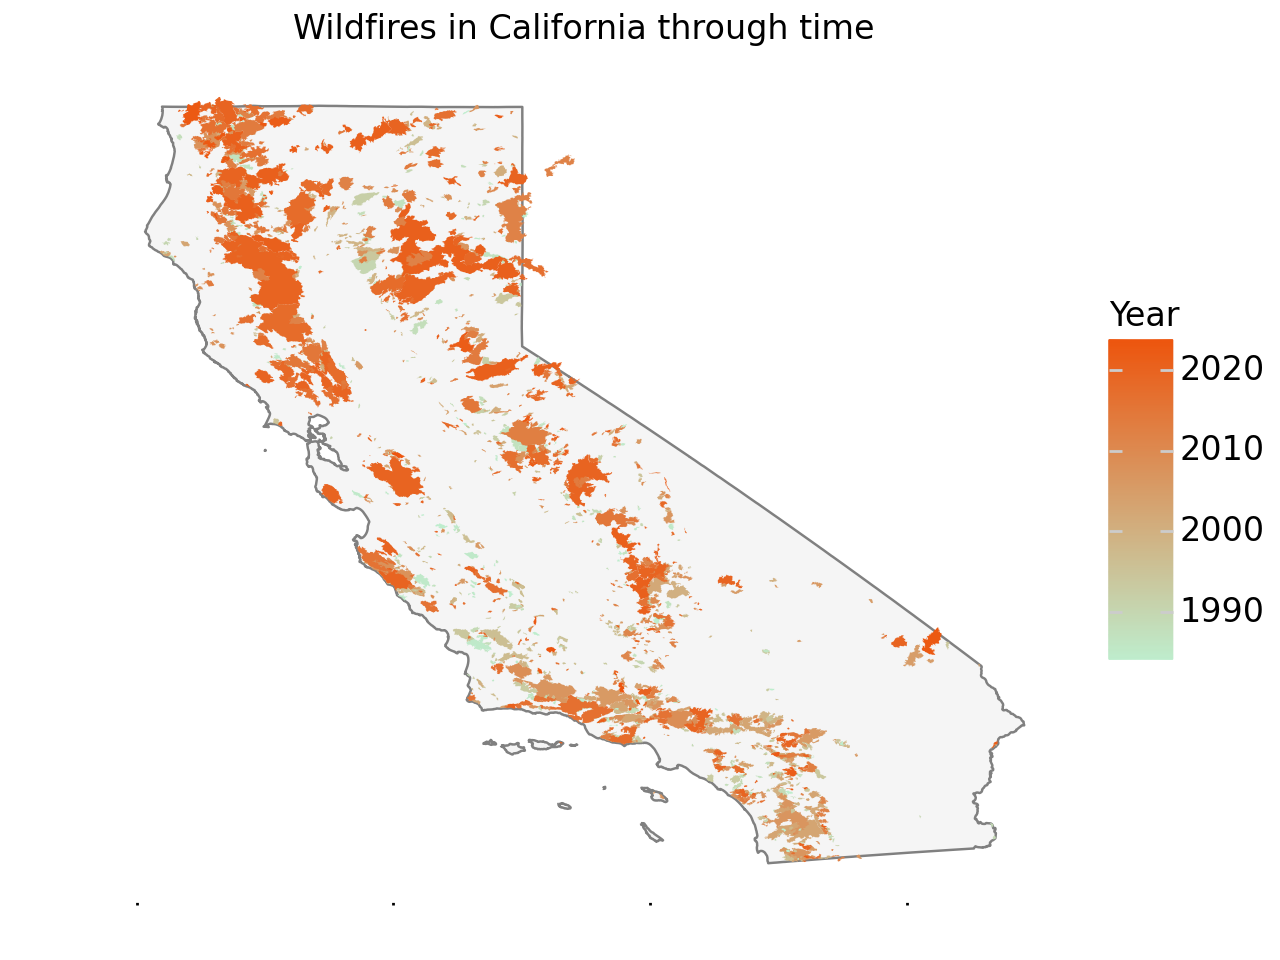

In [45]:
#plot all CA fires according to severity
(ggplot()
  + geom_map(california, fill= 'whitesmoke', color = 'grey')
  + geom_map(CA_df, aes(geometry = 'geometry', fill = 'Year'), color = '#FF000000')
  + scale_fill_gradientn(colors = ["#beedcd", "#ed550e"],limits = [1984, 2024])
  + labs(fill='Year')
  + ggtitle("Wildfires in California through time")
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

California Wildfire Frequency

In [46]:
# bucket by year
CA_df_years = CA_df.pivot_table(index = 'Year', values = 'Incid_Type', aggfunc = 'count')
CA_df_years = CA_df_years.rename(columns = {'Incid_Type': 'Wildfires'})
CA_df_years = CA_df_years.reset_index()
CA_df_years.head()

Year  Wildfires
0  1984         42
1  1985         64
2  1986         29
3  1987         85
4  1988         48

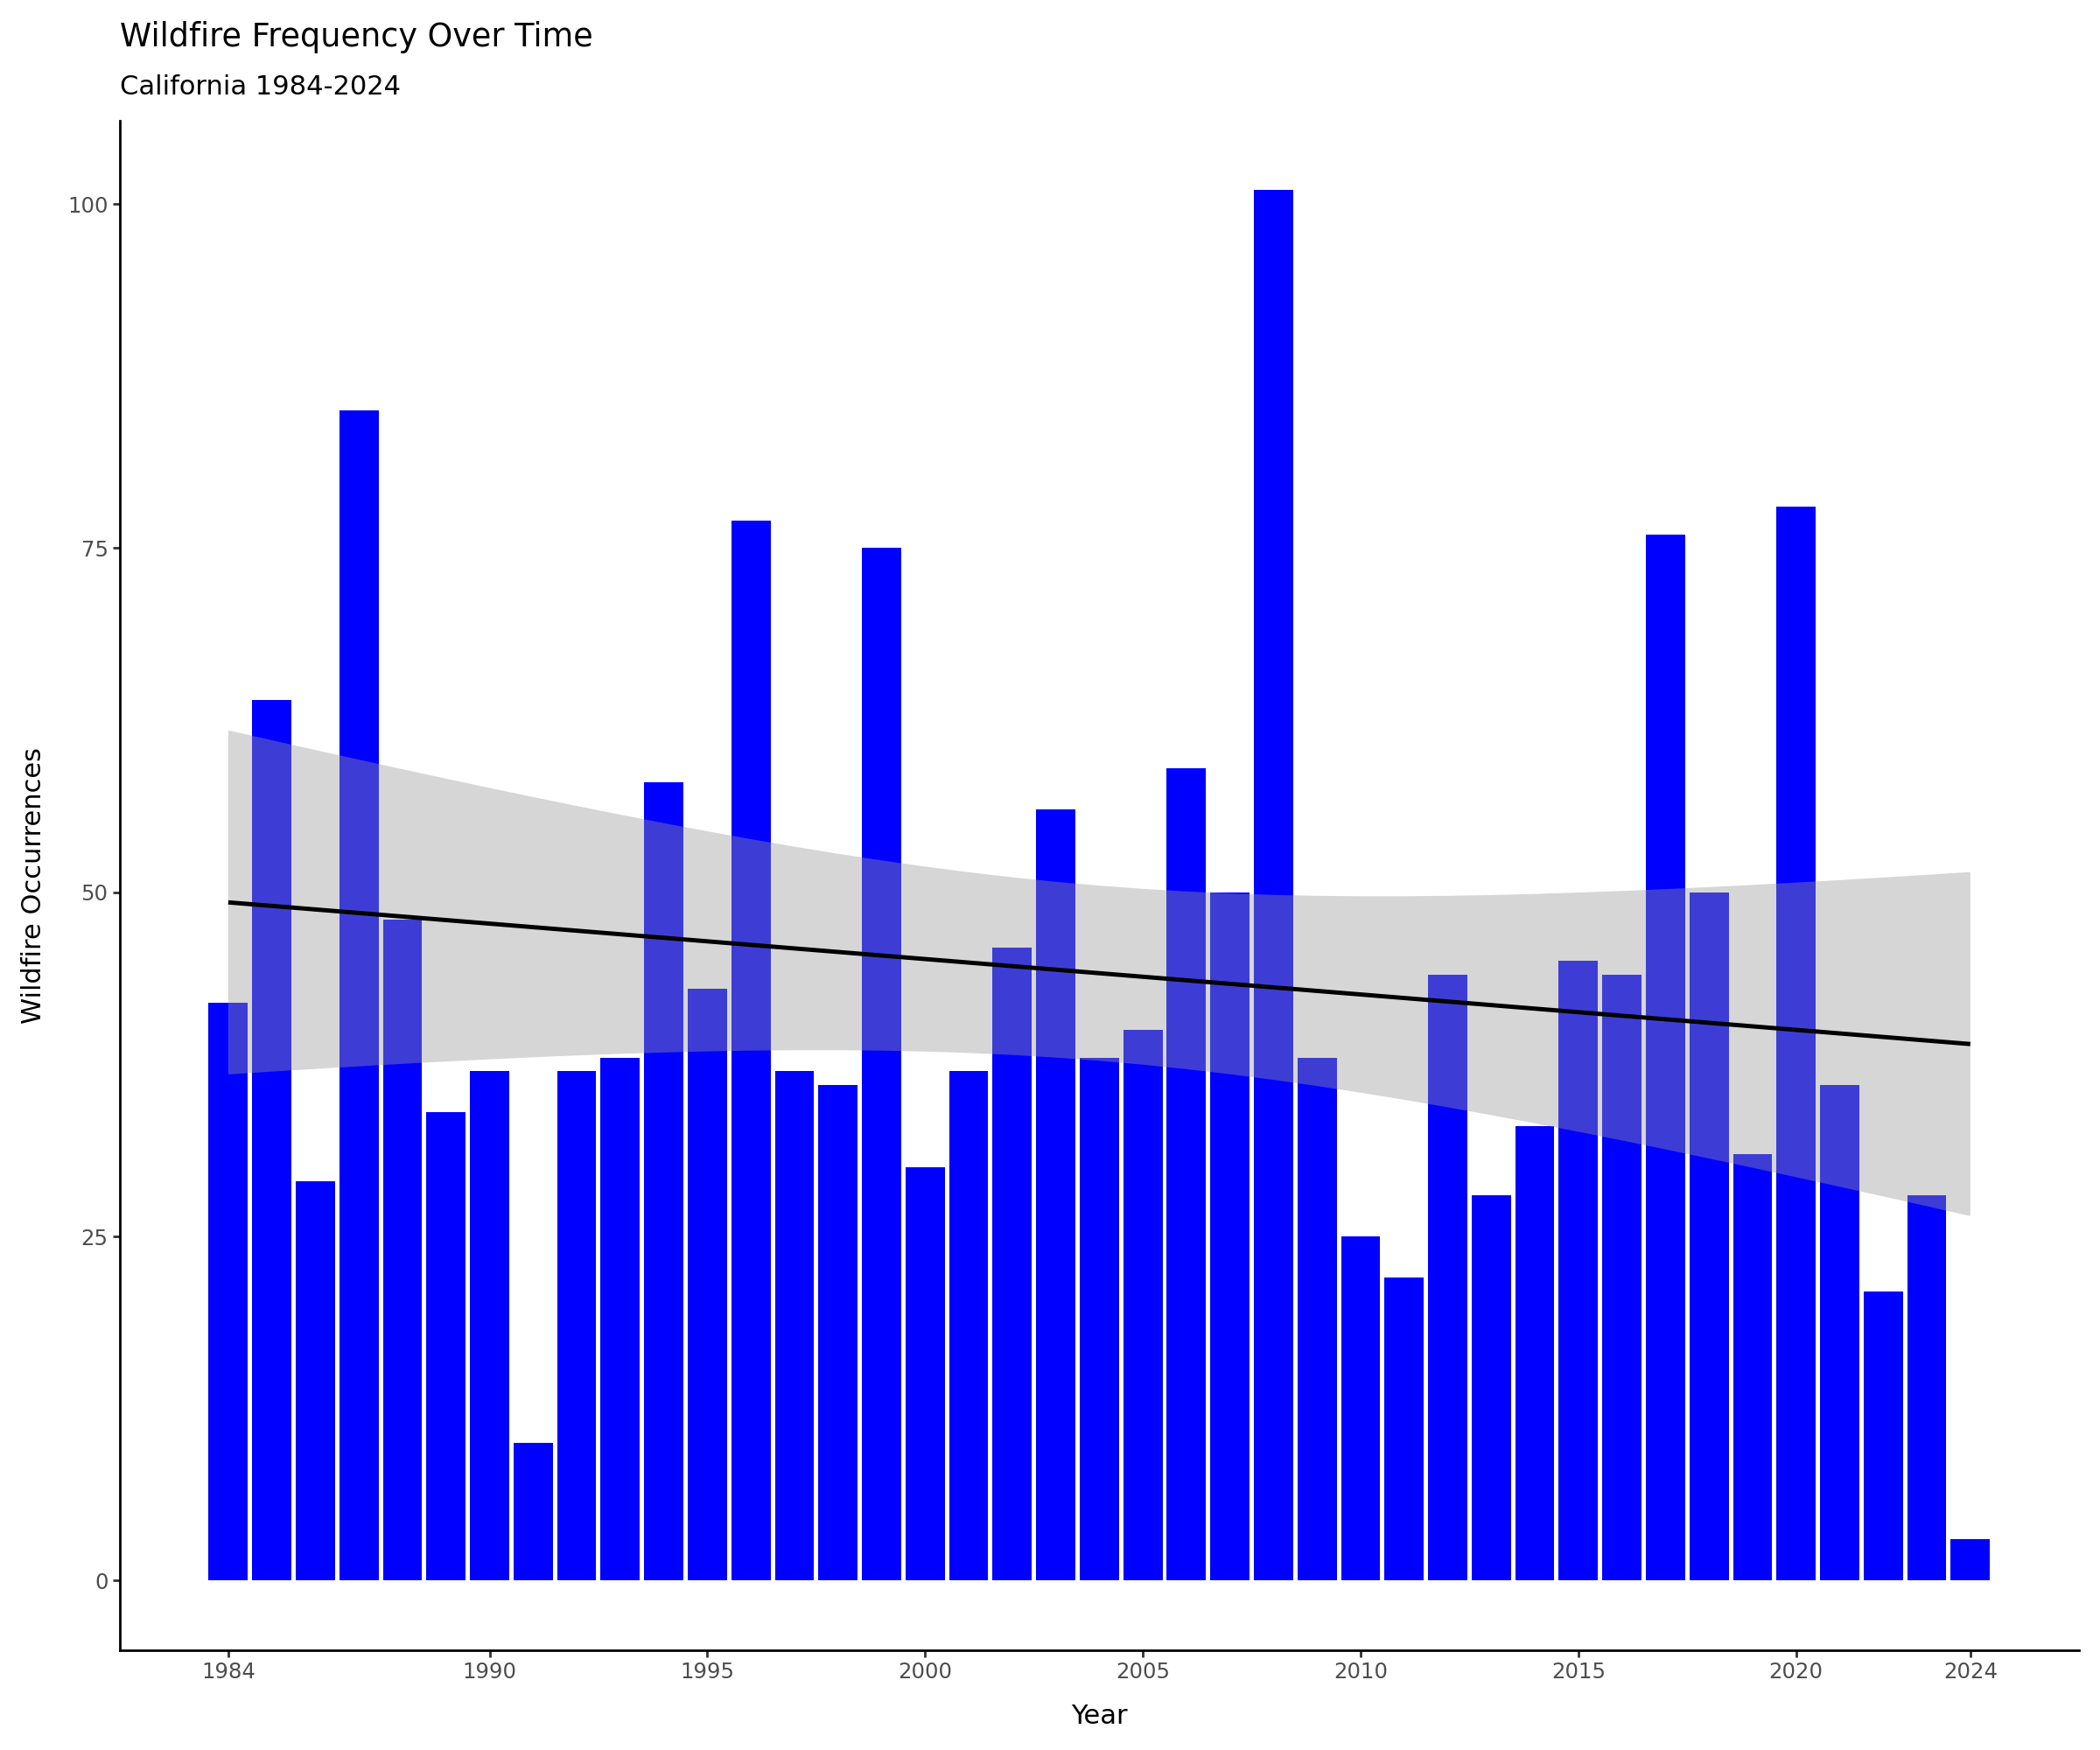

In [72]:
(
    ggplot(CA_df_years, aes(x = 'Year', y='Wildfires'))
       + geom_bar(stat = 'identity', fill = 'blue')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Wildfire Occurrences")
       + ggtitle("Wildfire Frequency Over Time")
       + labs (subtitle="California 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + theme_classic()

)

California Wildfire Size

In [48]:
CA_df_acres = CA_df.pivot_table(index = 'Year', values = 'BurnBndAc', aggfunc = 'sum')
CA_df_acres['BurnBndAc'] = CA_df_acres['BurnBndAc'].astype(int)
CA_df_acres['BurnBndAc'] = CA_df_acres['BurnBndAc'] / 1000000
CA_df_acres = CA_df_acres.reset_index()
CA_df_acres.head()

Year  BurnBndAc
0  1984   0.174275
1  1985   0.558454
2  1986   0.093186
3  1987   0.791185
4  1988   0.230920

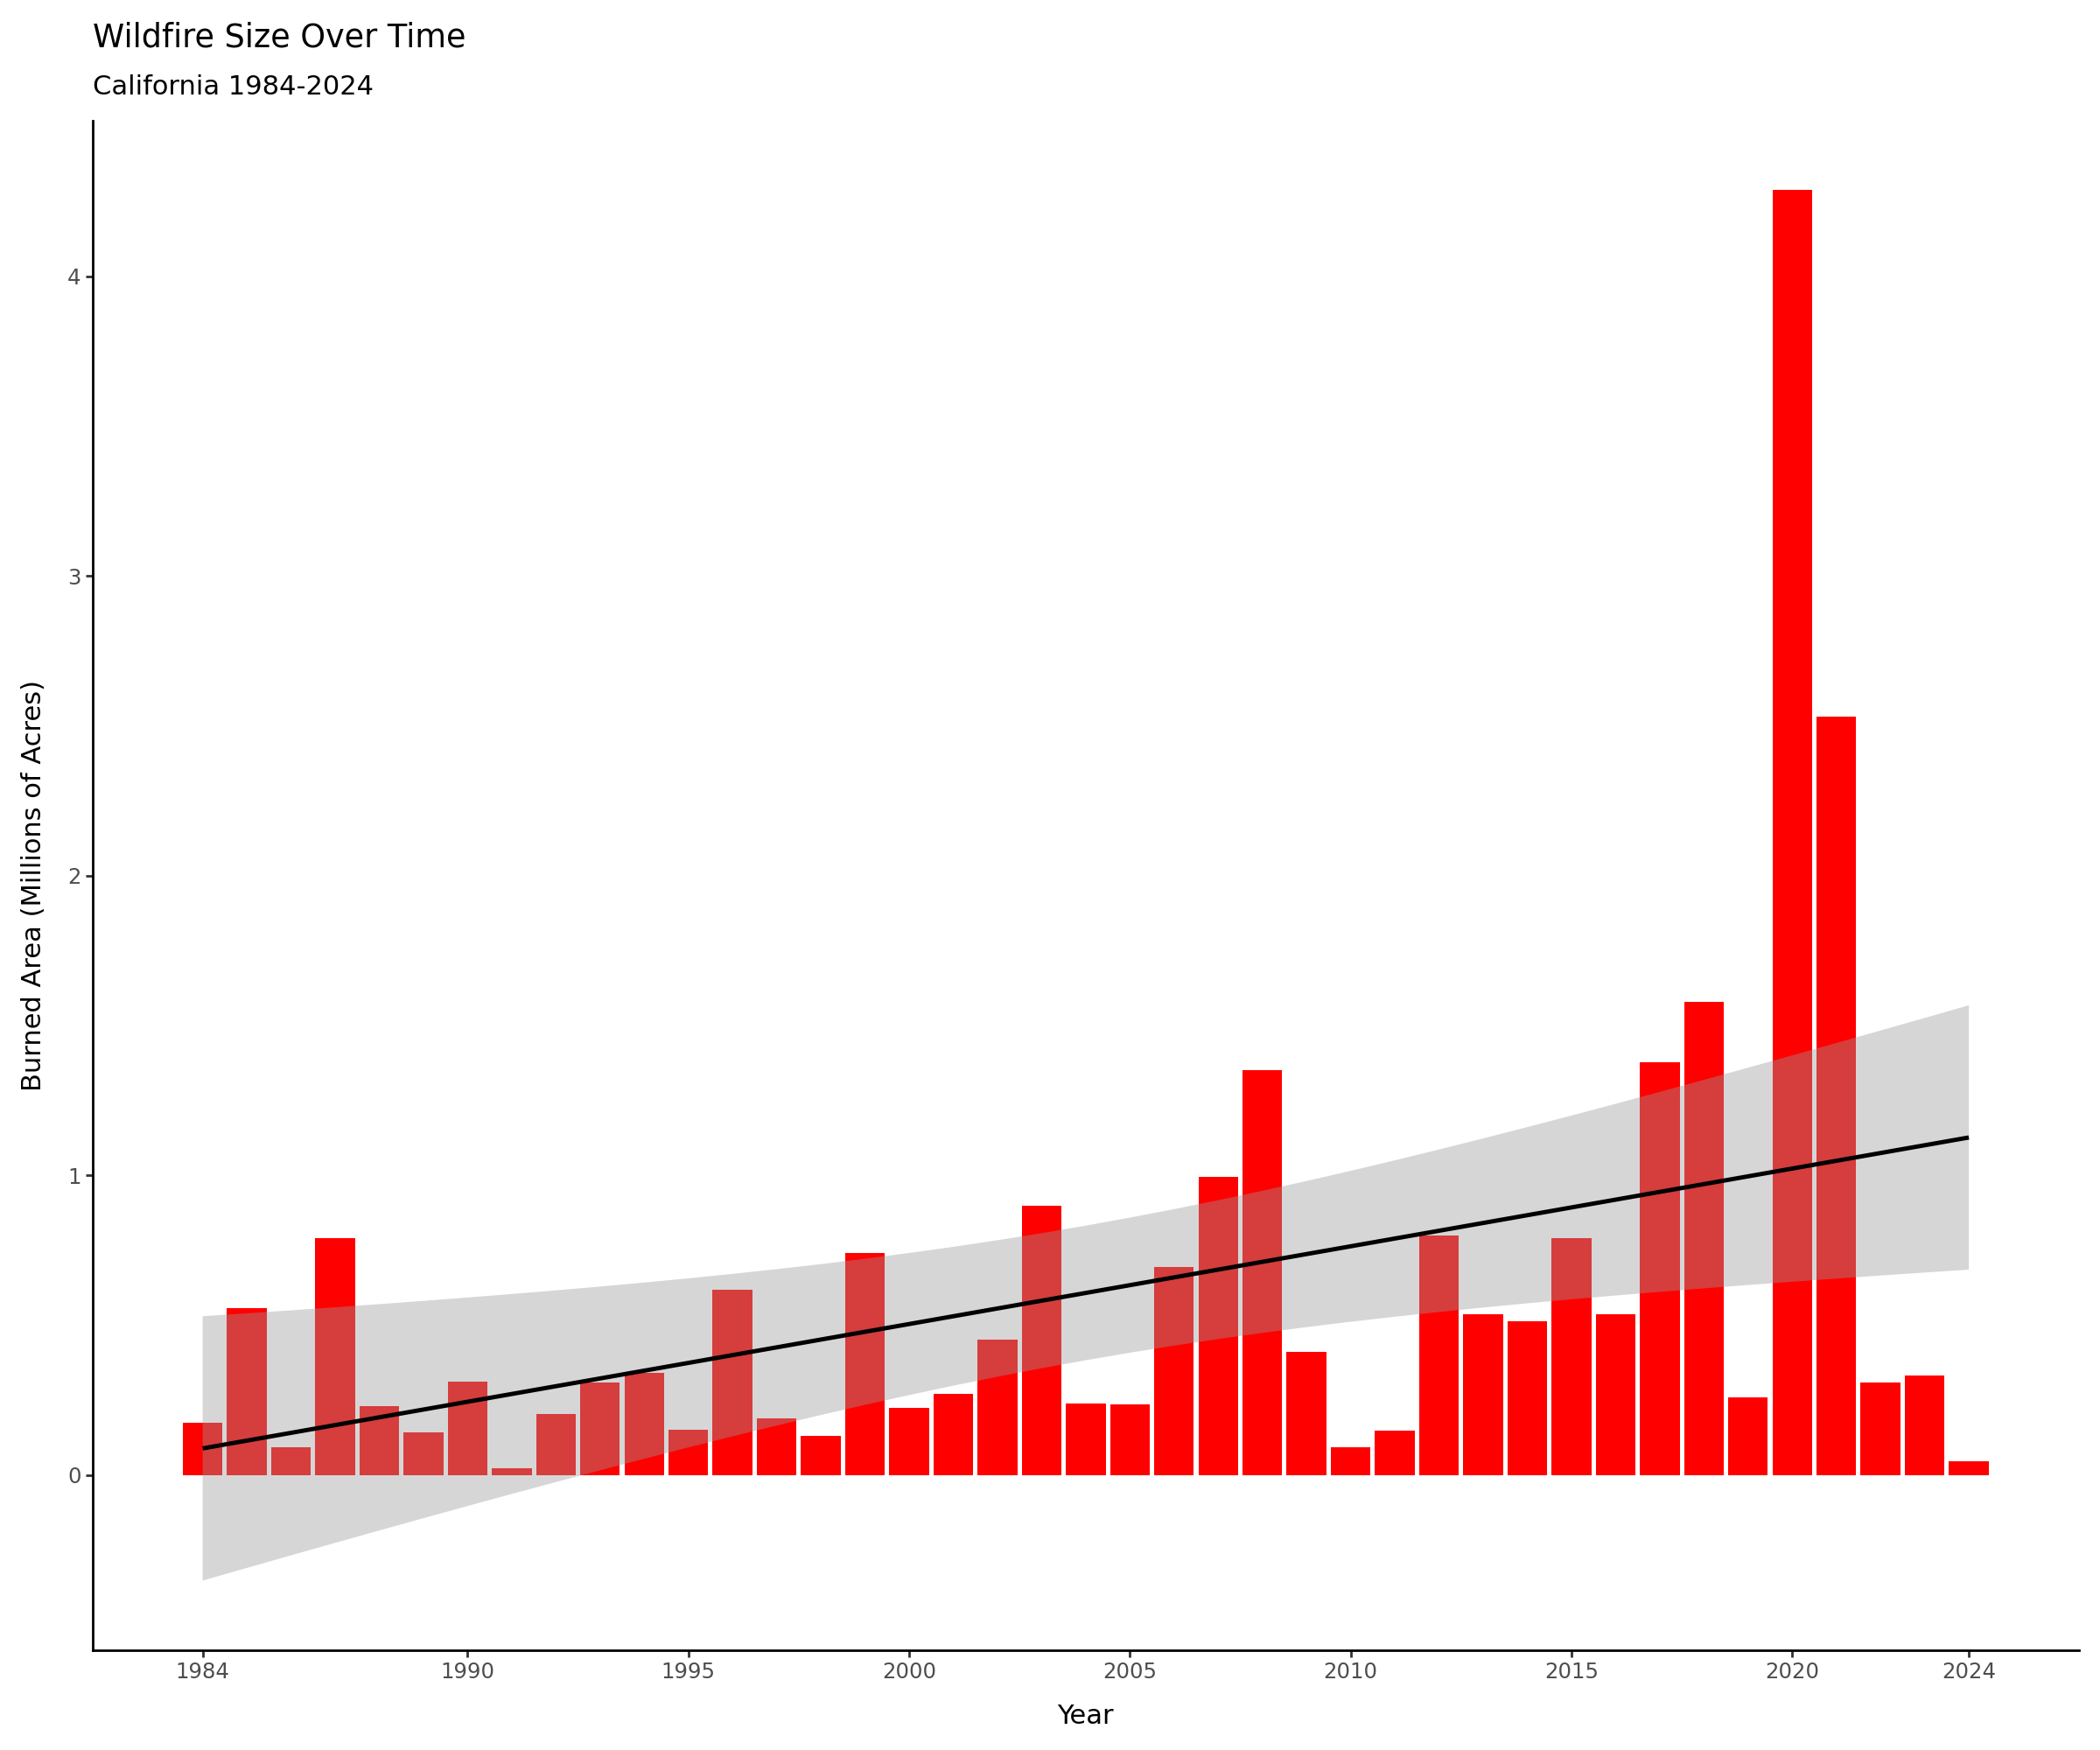

In [73]:
# fire size over time
(
    ggplot(CA_df_acres, aes(x = 'Year', y='BurnBndAc'))
       + geom_bar(stat = 'identity', fill = 'red')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Burned Area (Millions of Acres)")
       + ggtitle("Wildfire Size Over Time")
       + labs (subtitle="California 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + scale_y_continuous()
       + theme_classic()
)

# Alaska

Alaska Wildfire Map

In [50]:
#call Alaska boundary
alaska = df_states[df_states['NAME'] == 'Alaska']

In [51]:
#Limit df to Alaska
AK_df = df_columns[df_columns['State'] == 'AK']

AK_df.head()

State Incid_Name Incid_Type  BurnBndAc BurnBndLat BurnBndLon    Ig_Date  \
0     AK  CAMELBACK   Wildfire       4780     62.603   -157.421 1985-08-01   
1     AK  SUGARLOAF   Wildfire       5489     62.562   -156.645 1985-07-20   
2     AK  TAL NW 44   Wildfire       1491     65.476   -153.829 1985-08-01   
3     AK  GAL NE 48   Wildfire       1298     65.210   -155.265 1985-08-03   
19    AK  GAL NE 57   Wildfire      33126     65.439   -155.451 1985-07-13   

    dNBR_offst  NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
0         27.0      -970        -150    130    334     585   
1          3.0      -970        -150     70    320     600   
2         14.0      -970        -150     50    275     530   
3         14.0      -970        -150    100    321     580   
19         4.0      -970        -150     70    414     775   

                                             geometry  Year  
0   POLYGON ((-157.44988 62.62182, -157.44895 62.6...  1985  
1   POLYGON ((-156.69736 62.57441, -156.70027 62.5...  1985  
2   POLYGON ((-153.84454 65.46265, -153.84574 65.4...  1985  
3   POLYGON ((-155.27031 65.22507, -155.26915 65.2...  1985  
19  POLYGON ((-155.43668 65.49182, -155.43351 65.4...  1985

In [52]:
#Set CRS
AK_df = AK_df.to_crs(epsg=4269)

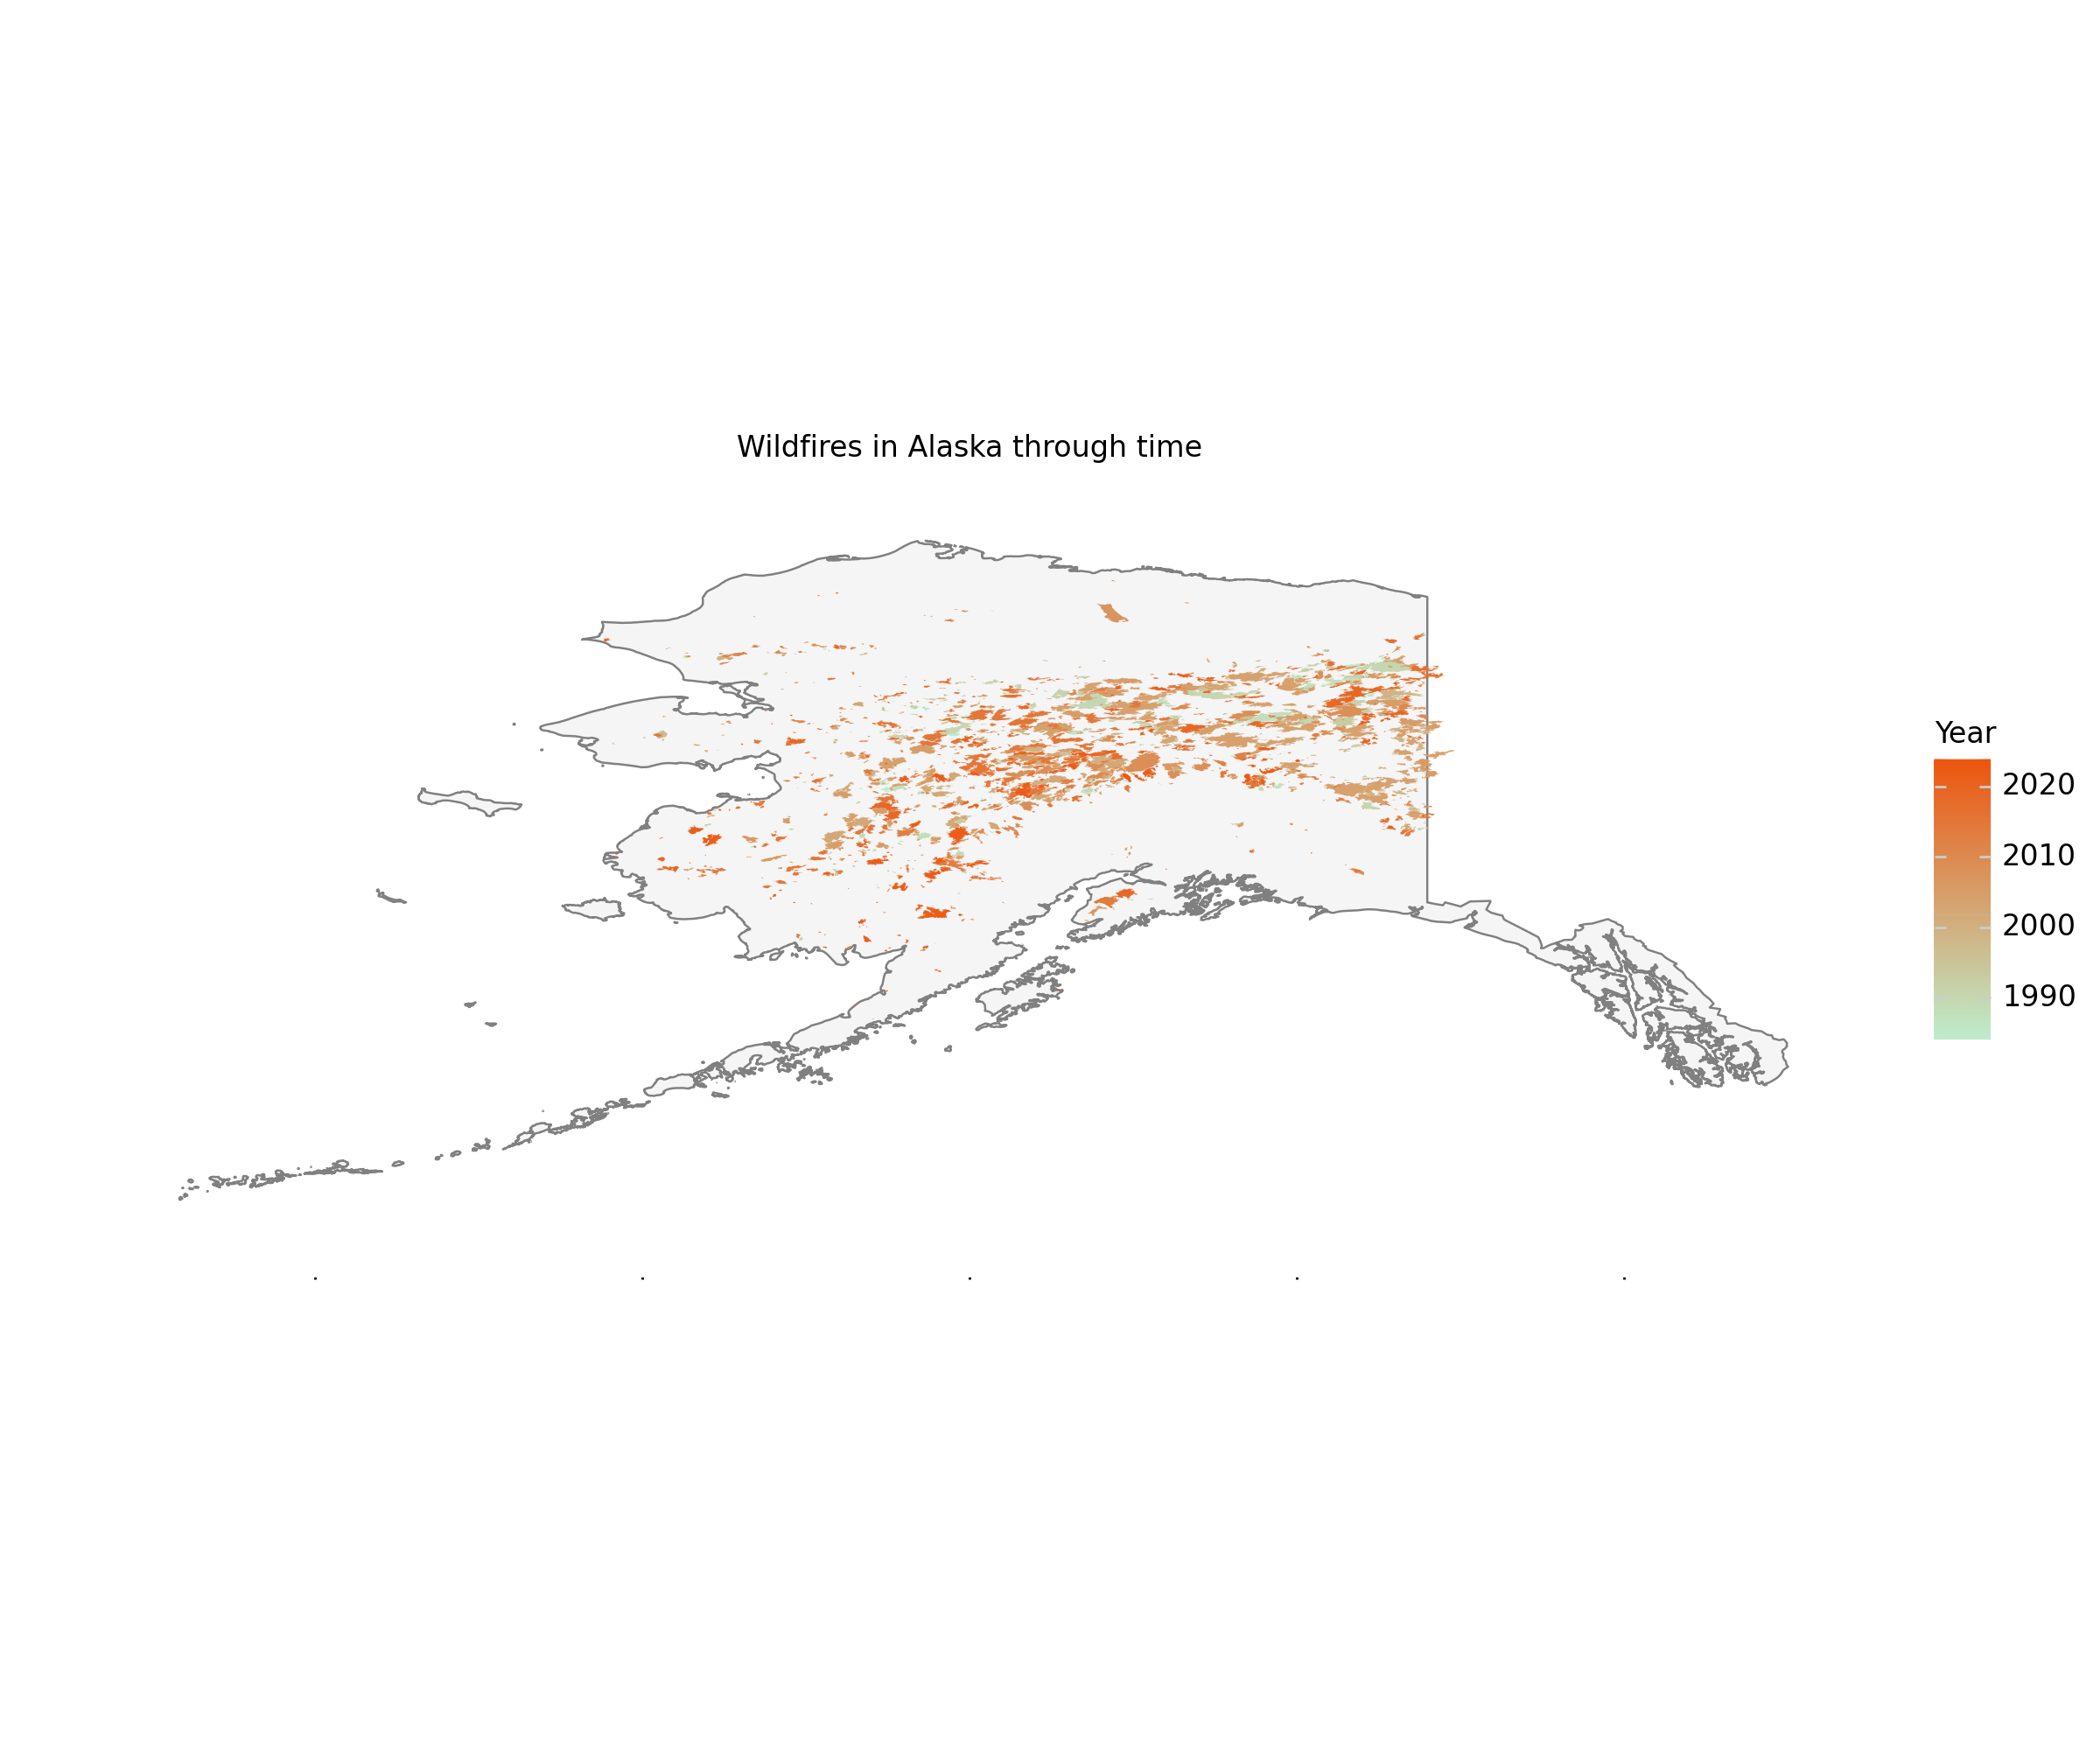

In [53]:
#plot all AK fires according to severity
plotnine.options.figure_size = (12, 10)

(ggplot()
  + geom_map(alaska, fill='whitesmoke', color='grey')
  + geom_map(AK_df, aes(geometry='geometry', fill='Year'), color='#FF000000')
  + scale_fill_gradientn(colors=["#beedcd", "#ed550e"], limits=[1984, 2024])
  + labs(fill='Year')
  + ggtitle("Wildfires in Alaska through time")
  + theme_classic()
  + theme(
      axis_line=element_line(color="white"),
      axis_ticks=element_line(color="white"),
      axis_text=element_line(color='white'),
      text=element_text(size=12)
  )
  + coord_fixed(xlim=[-180, -130], ylim=[50, 72]) #alter fixed limites to exclude eastern most islands without fires, creating more consolidated graph
)

Alaska Wildfire Frequency

In [54]:
# bucket by year
AK_df_years = AK_df.pivot_table(index = 'Year', values = 'Incid_Type', aggfunc = 'count')
AK_df_years = AK_df_years.rename(columns = {'Incid_Type': 'Wildfires'})
AK_df_years = AK_df_years.reset_index()
AK_df_years.head()

Year  Wildfires
0  1984         19
1  1985         22
2  1986         36
3  1987         14
4  1988         22

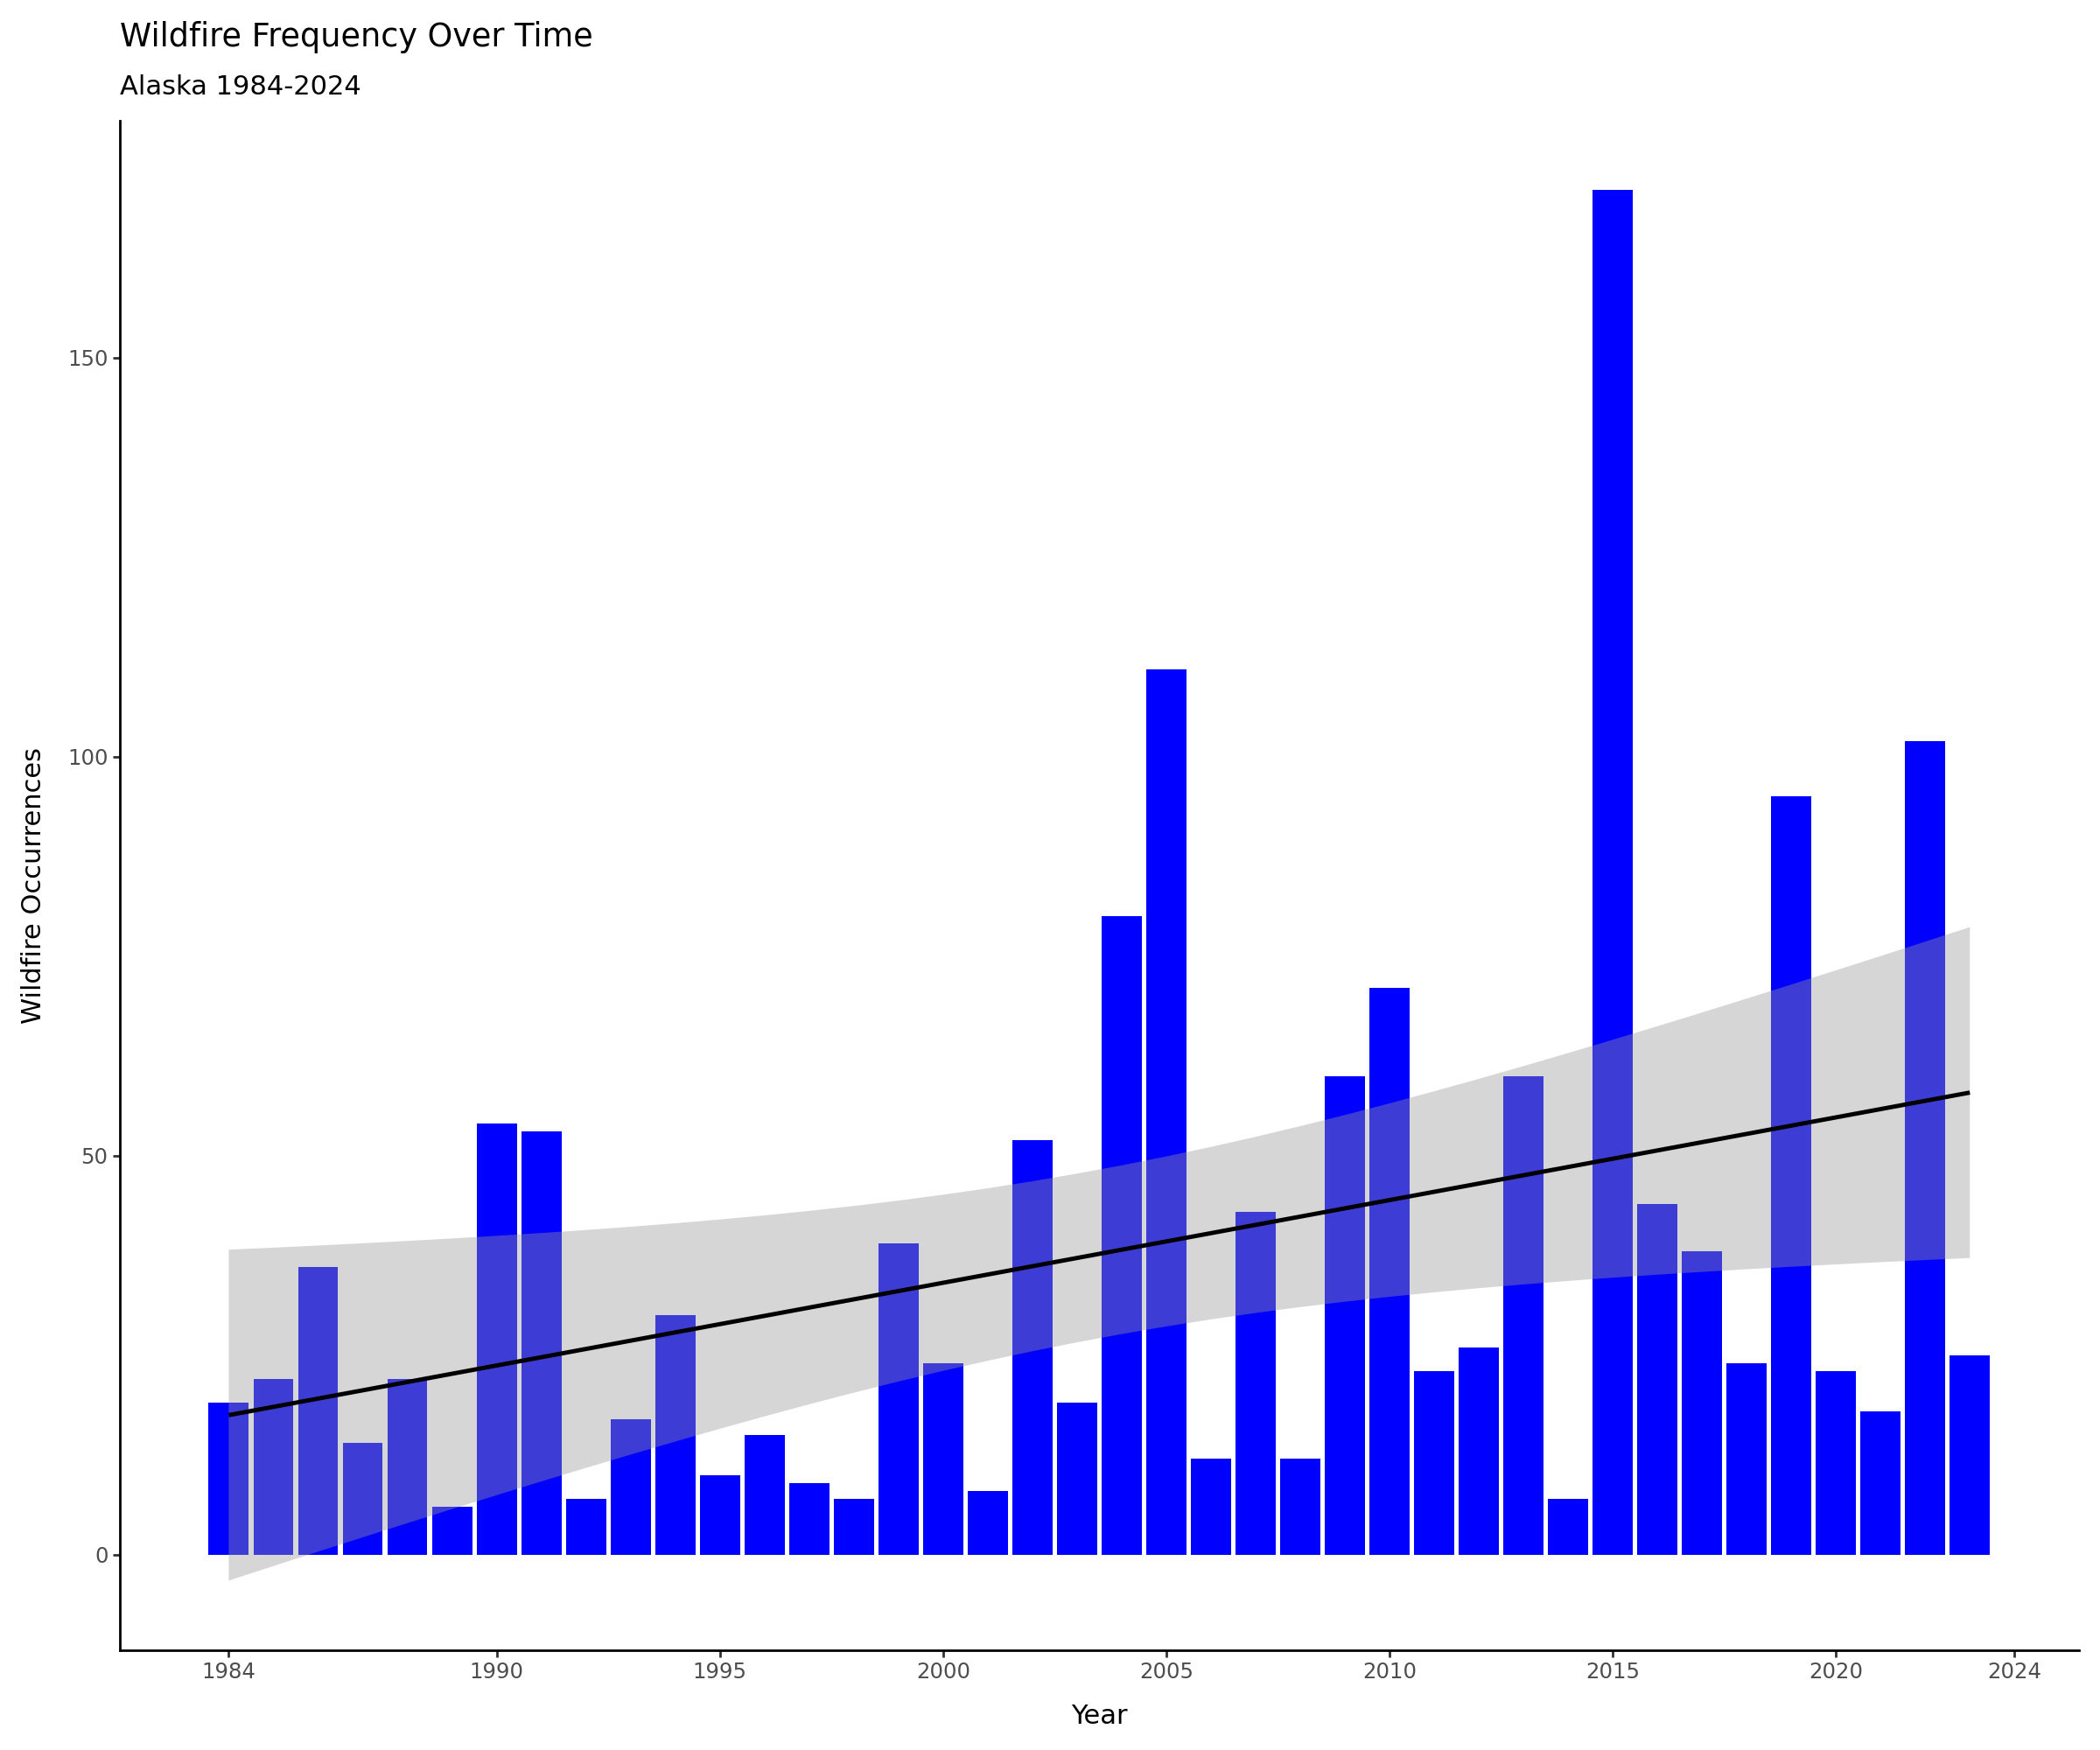

In [74]:
(
    ggplot(AK_df_years, aes(x = 'Year', y='Wildfires'))
       + geom_bar(stat = 'identity', fill = 'blue')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Wildfire Occurrences")
       + ggtitle("Wildfire Frequency Over Time")
       + labs (subtitle="Alaska 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + theme_classic()

)

Alaska Wildfire Size

In [56]:
AK_df_acres = AK_df.pivot_table(index = 'Year', values = 'BurnBndAc', aggfunc = 'sum')
AK_df_acres['BurnBndAc'] = AK_df_acres['BurnBndAc'].astype(int)
AK_df_acres['BurnBndAc'] = AK_df_acres['BurnBndAc'] / 1000000
AK_df_acres = AK_df_acres.reset_index()
AK_df_acres.head()

Year  BurnBndAc
0  1984   0.097965
1  1985   0.334662
2  1986   0.313788
3  1987   0.110934
4  1988   0.901222

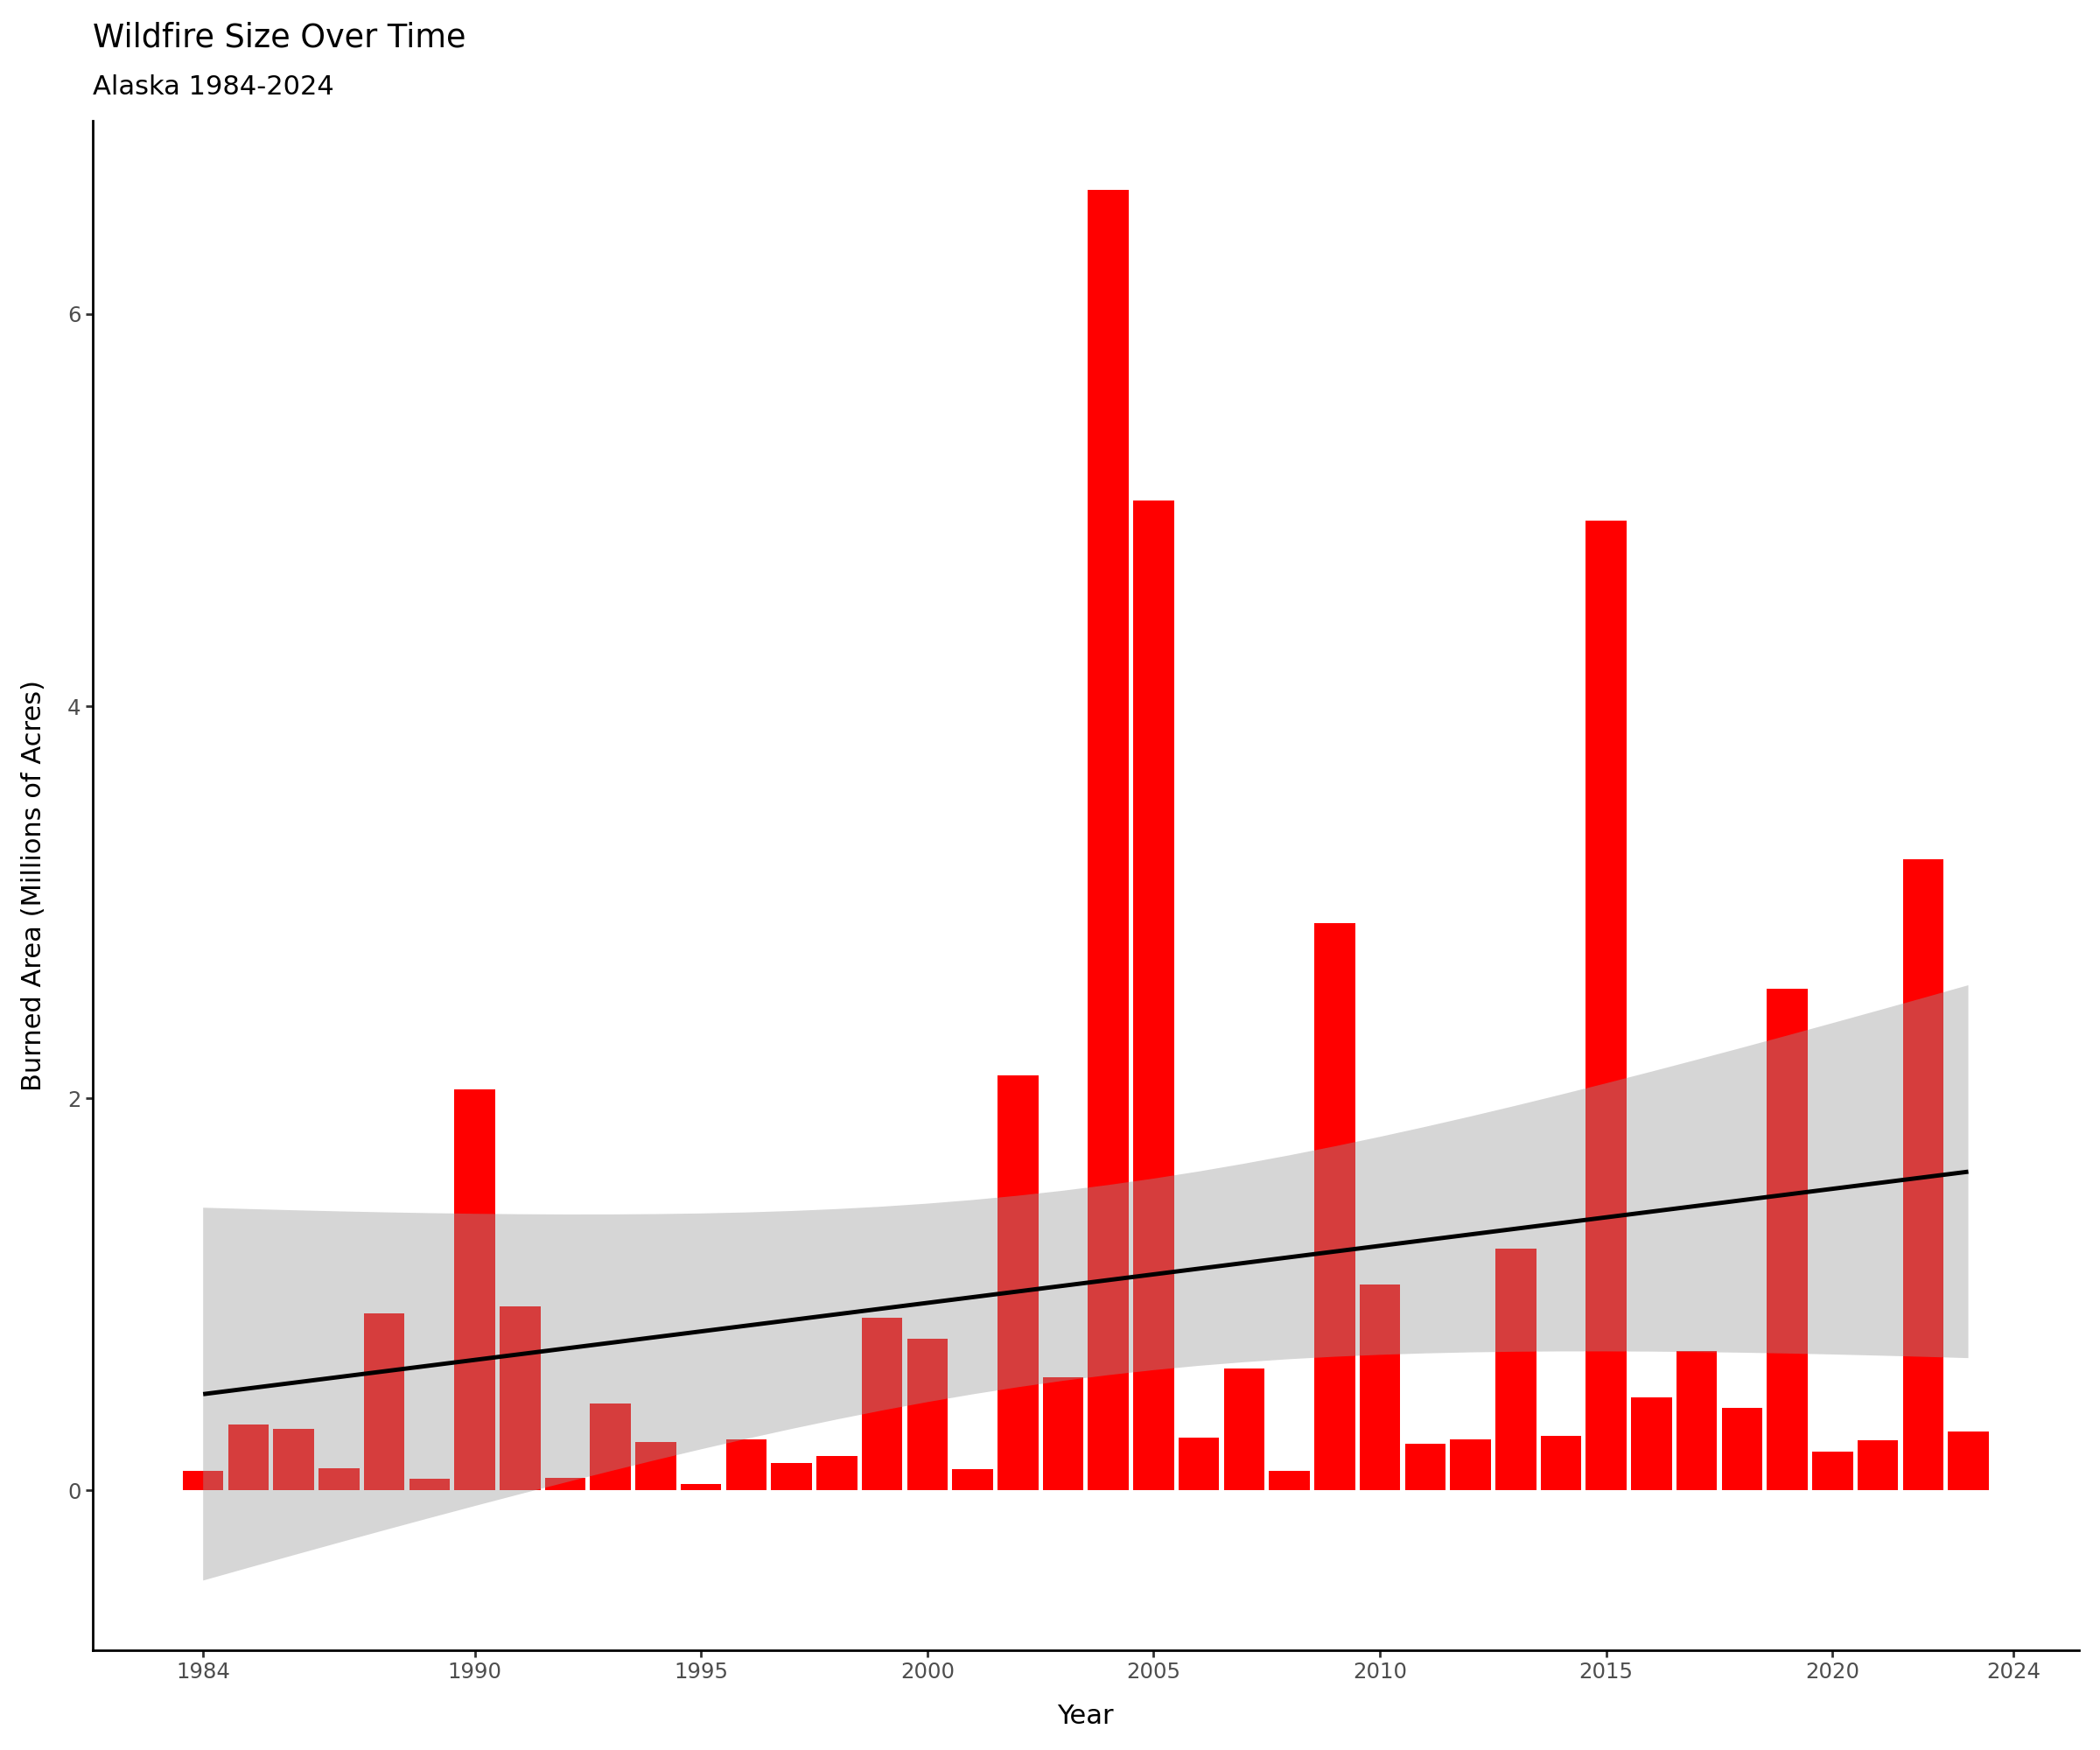

In [71]:
# fire size over time
(
    ggplot(AK_df_acres, aes(x = 'Year', y='BurnBndAc'))
       + geom_bar(stat = 'identity', fill = 'red')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Burned Area (Millions of Acres)")
       + ggtitle("Wildfire Size Over Time")
       + labs (subtitle="Alaska 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + scale_y_continuous()
       + theme_classic()
)

# Nevada

Nevada Wildfire Map

In [58]:
#call Nevada boundary
nevada = df_states[df_states['NAME'] == 'Nevada']

In [59]:
#Limit df to Nevada
NV_df = df_columns[df_columns['State'] == 'NV']

NV_df.head()

State  Incid_Name Incid_Type  BurnBndAc BurnBndLat BurnBndLon    Ig_Date  \
44    NV  DRY VALLEY   Wildfire      15749     40.246   -119.894 1985-06-19   
89    NV  COTTONWOOD   Wildfire      16877     40.128   -117.091 1985-07-07   
90    NV  FIRE CREEK   Wildfire      15527     40.537   -116.556 1985-07-10   
91    NV  BEDEL FLAT   Wildfire       9490     39.839   -119.754 1985-07-18   
92    NV  COCOON MTS   Wildfire       8000     39.220   -118.519 1985-07-29   

    dNBR_offst  NoData_T  IncGreen_T  Low_T  Mod_T  High_T  \
44        20.0      -970        -150     55    126     250   
89        46.0      -970        -150    130    262     450   
90        42.0      -970        -150    100   9999    9999   
91       -19.0      -970        -150    -10    180    9999   
92        38.0      -970        -150    120    200    9999   

                                             geometry  Year  
44  POLYGON ((-119.93797 40.26402, -119.93713 40.2...  1985  
89  POLYGON ((-117.1591 40.0655, -117.15924 40.065...  1985  
90  POLYGON ((-116.6314 40.51879, -116.63085 40.51...  1985  
91  POLYGON ((-119.76346 39.88091, -119.76204 39.8...  1985  
92  POLYGON ((-118.53423 39.25839, -118.53373 39.2...  1985

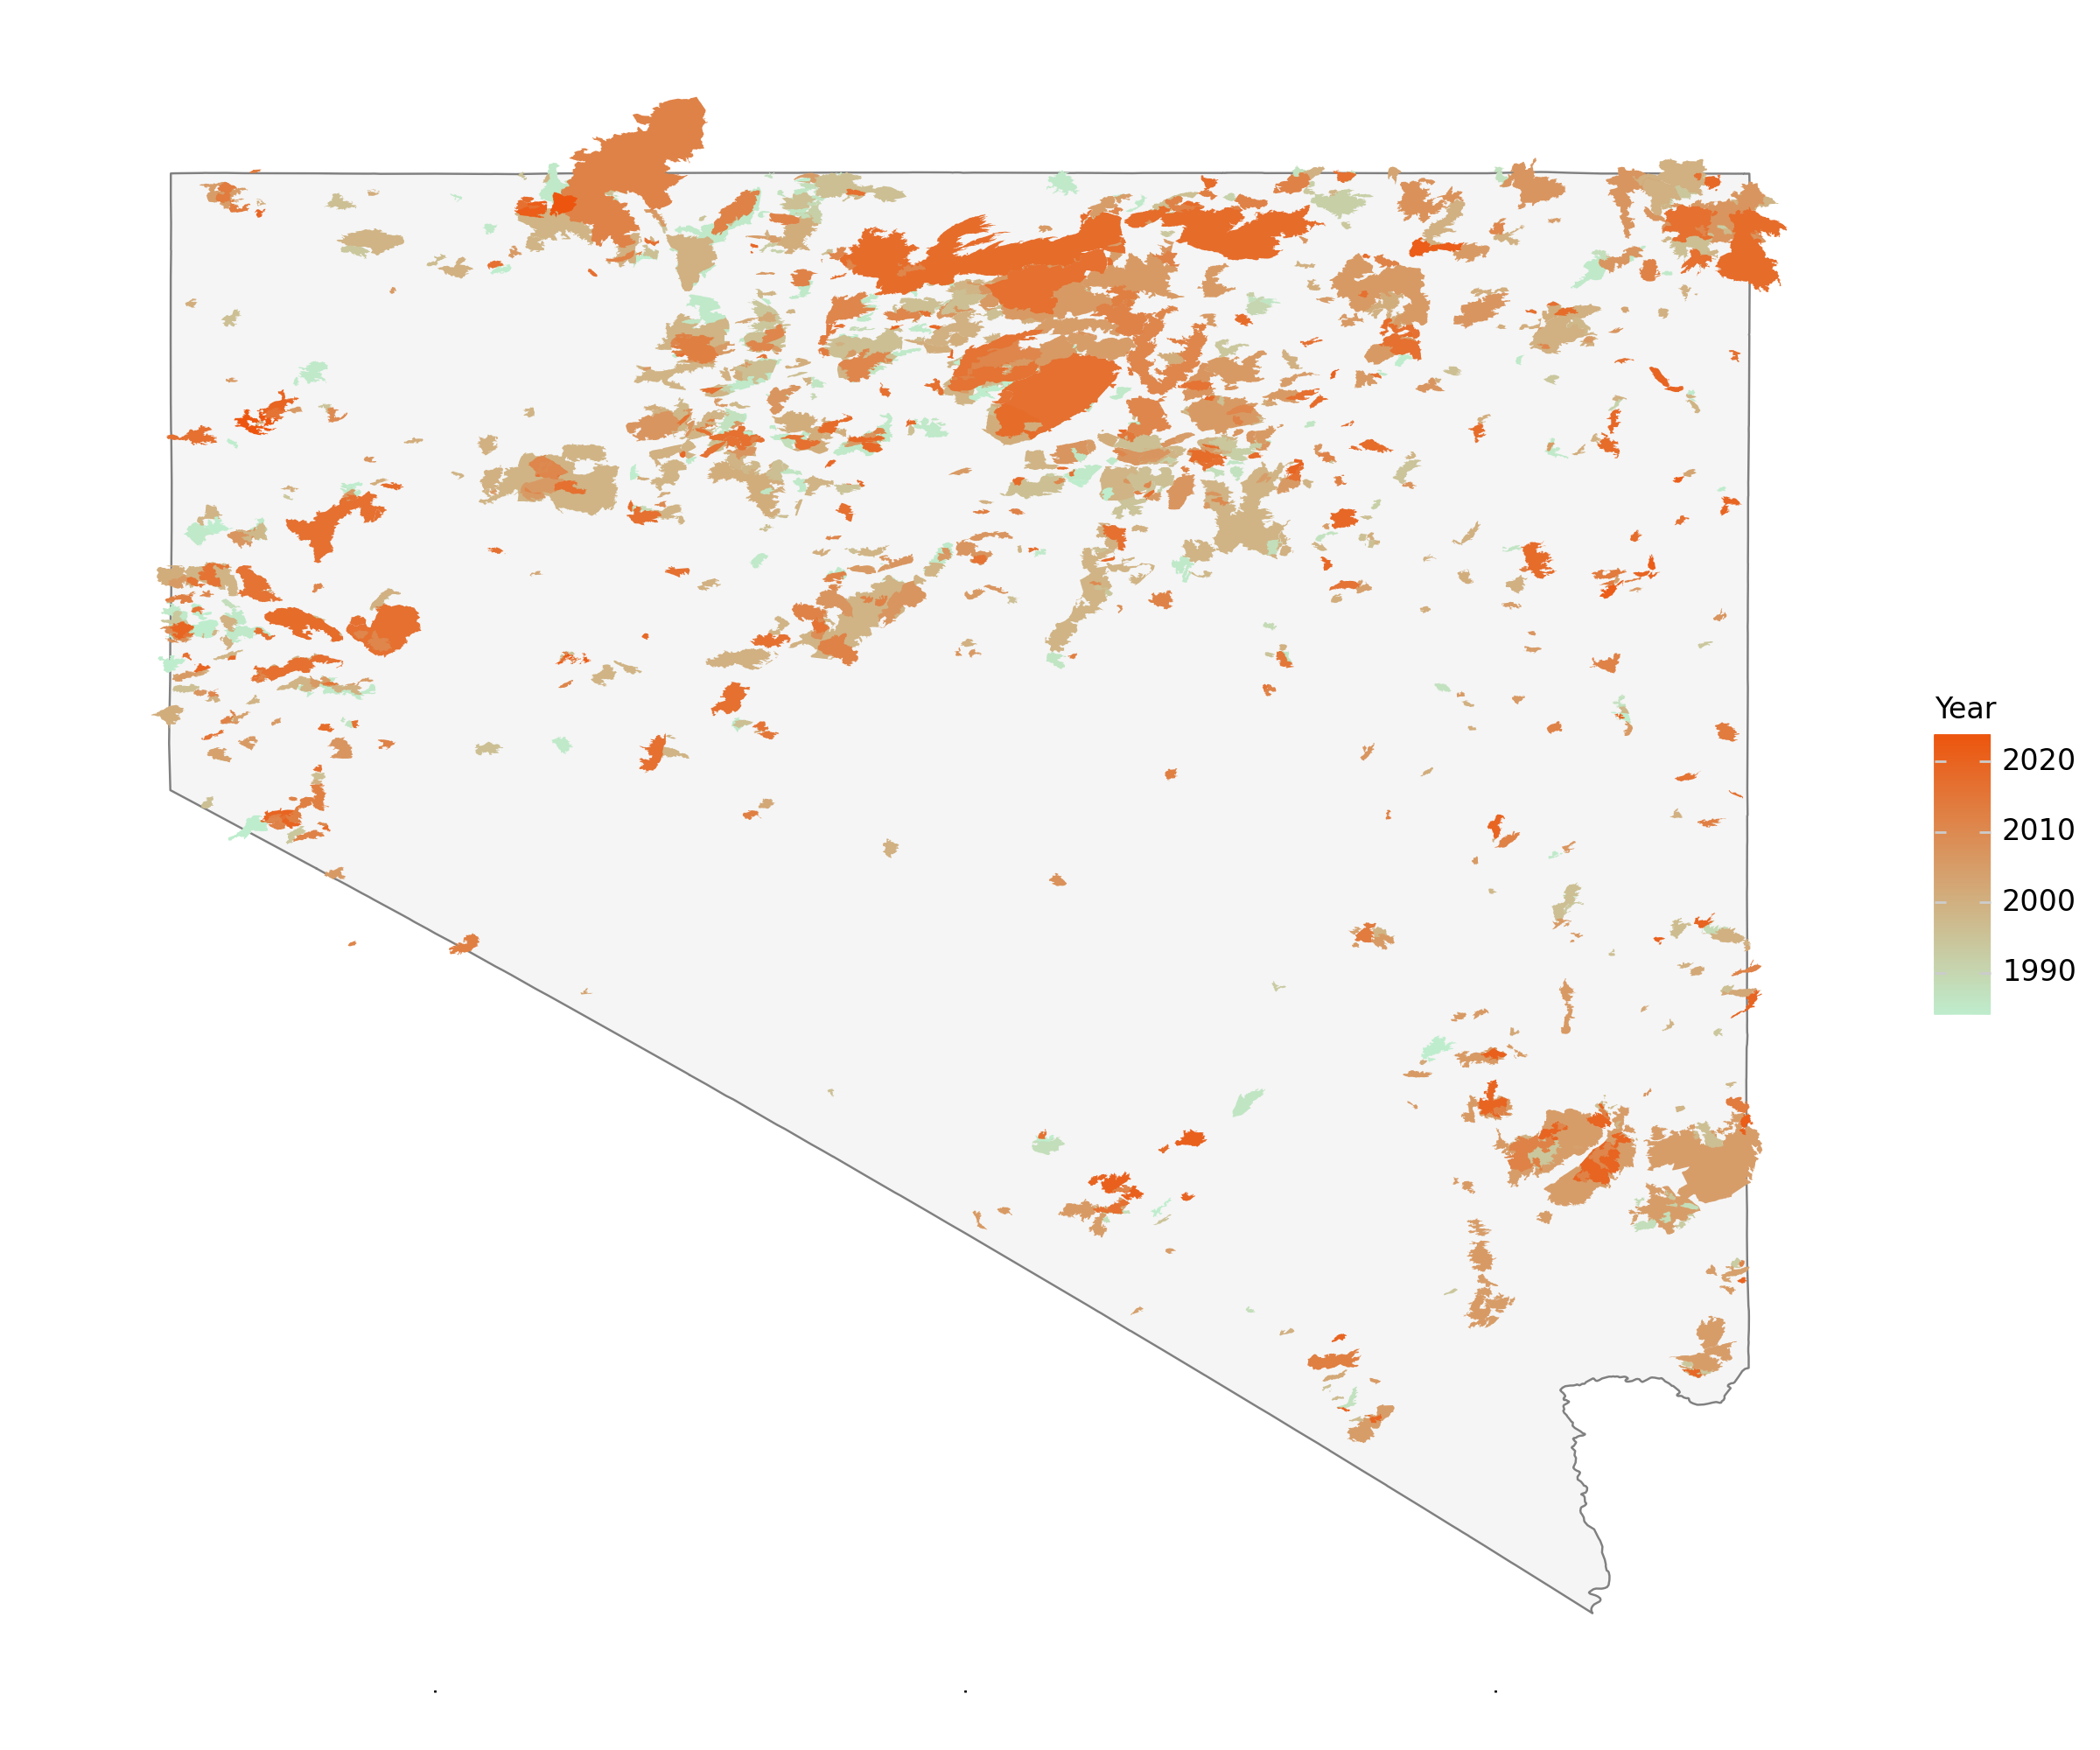

In [60]:
#plot all CA fires according to severity
(ggplot()
  + geom_map(nevada, fill= 'whitesmoke', color = 'grey')
  + geom_map(NV_df, aes(geometry = 'geometry', fill = 'Year'), color = '#FF000000')
  + scale_fill_gradientn(colors = ["#beedcd", "#ed550e"],limits = [1984, 2024])
  + labs(fill='Year')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

Nevada Wildfire Frequency

In [61]:
# bucket by year
NV_df_years = NV_df.pivot_table(index = 'Year', values = 'Incid_Type', aggfunc = 'count')
NV_df_years = NV_df_years.rename(columns = {'Incid_Type': 'Wildfires'})
NV_df_years = NV_df_years.reset_index()
NV_df_years.head()

Year  Wildfires
0  1984         29
1  1985         72
2  1986         19
3  1987         19
4  1988         19

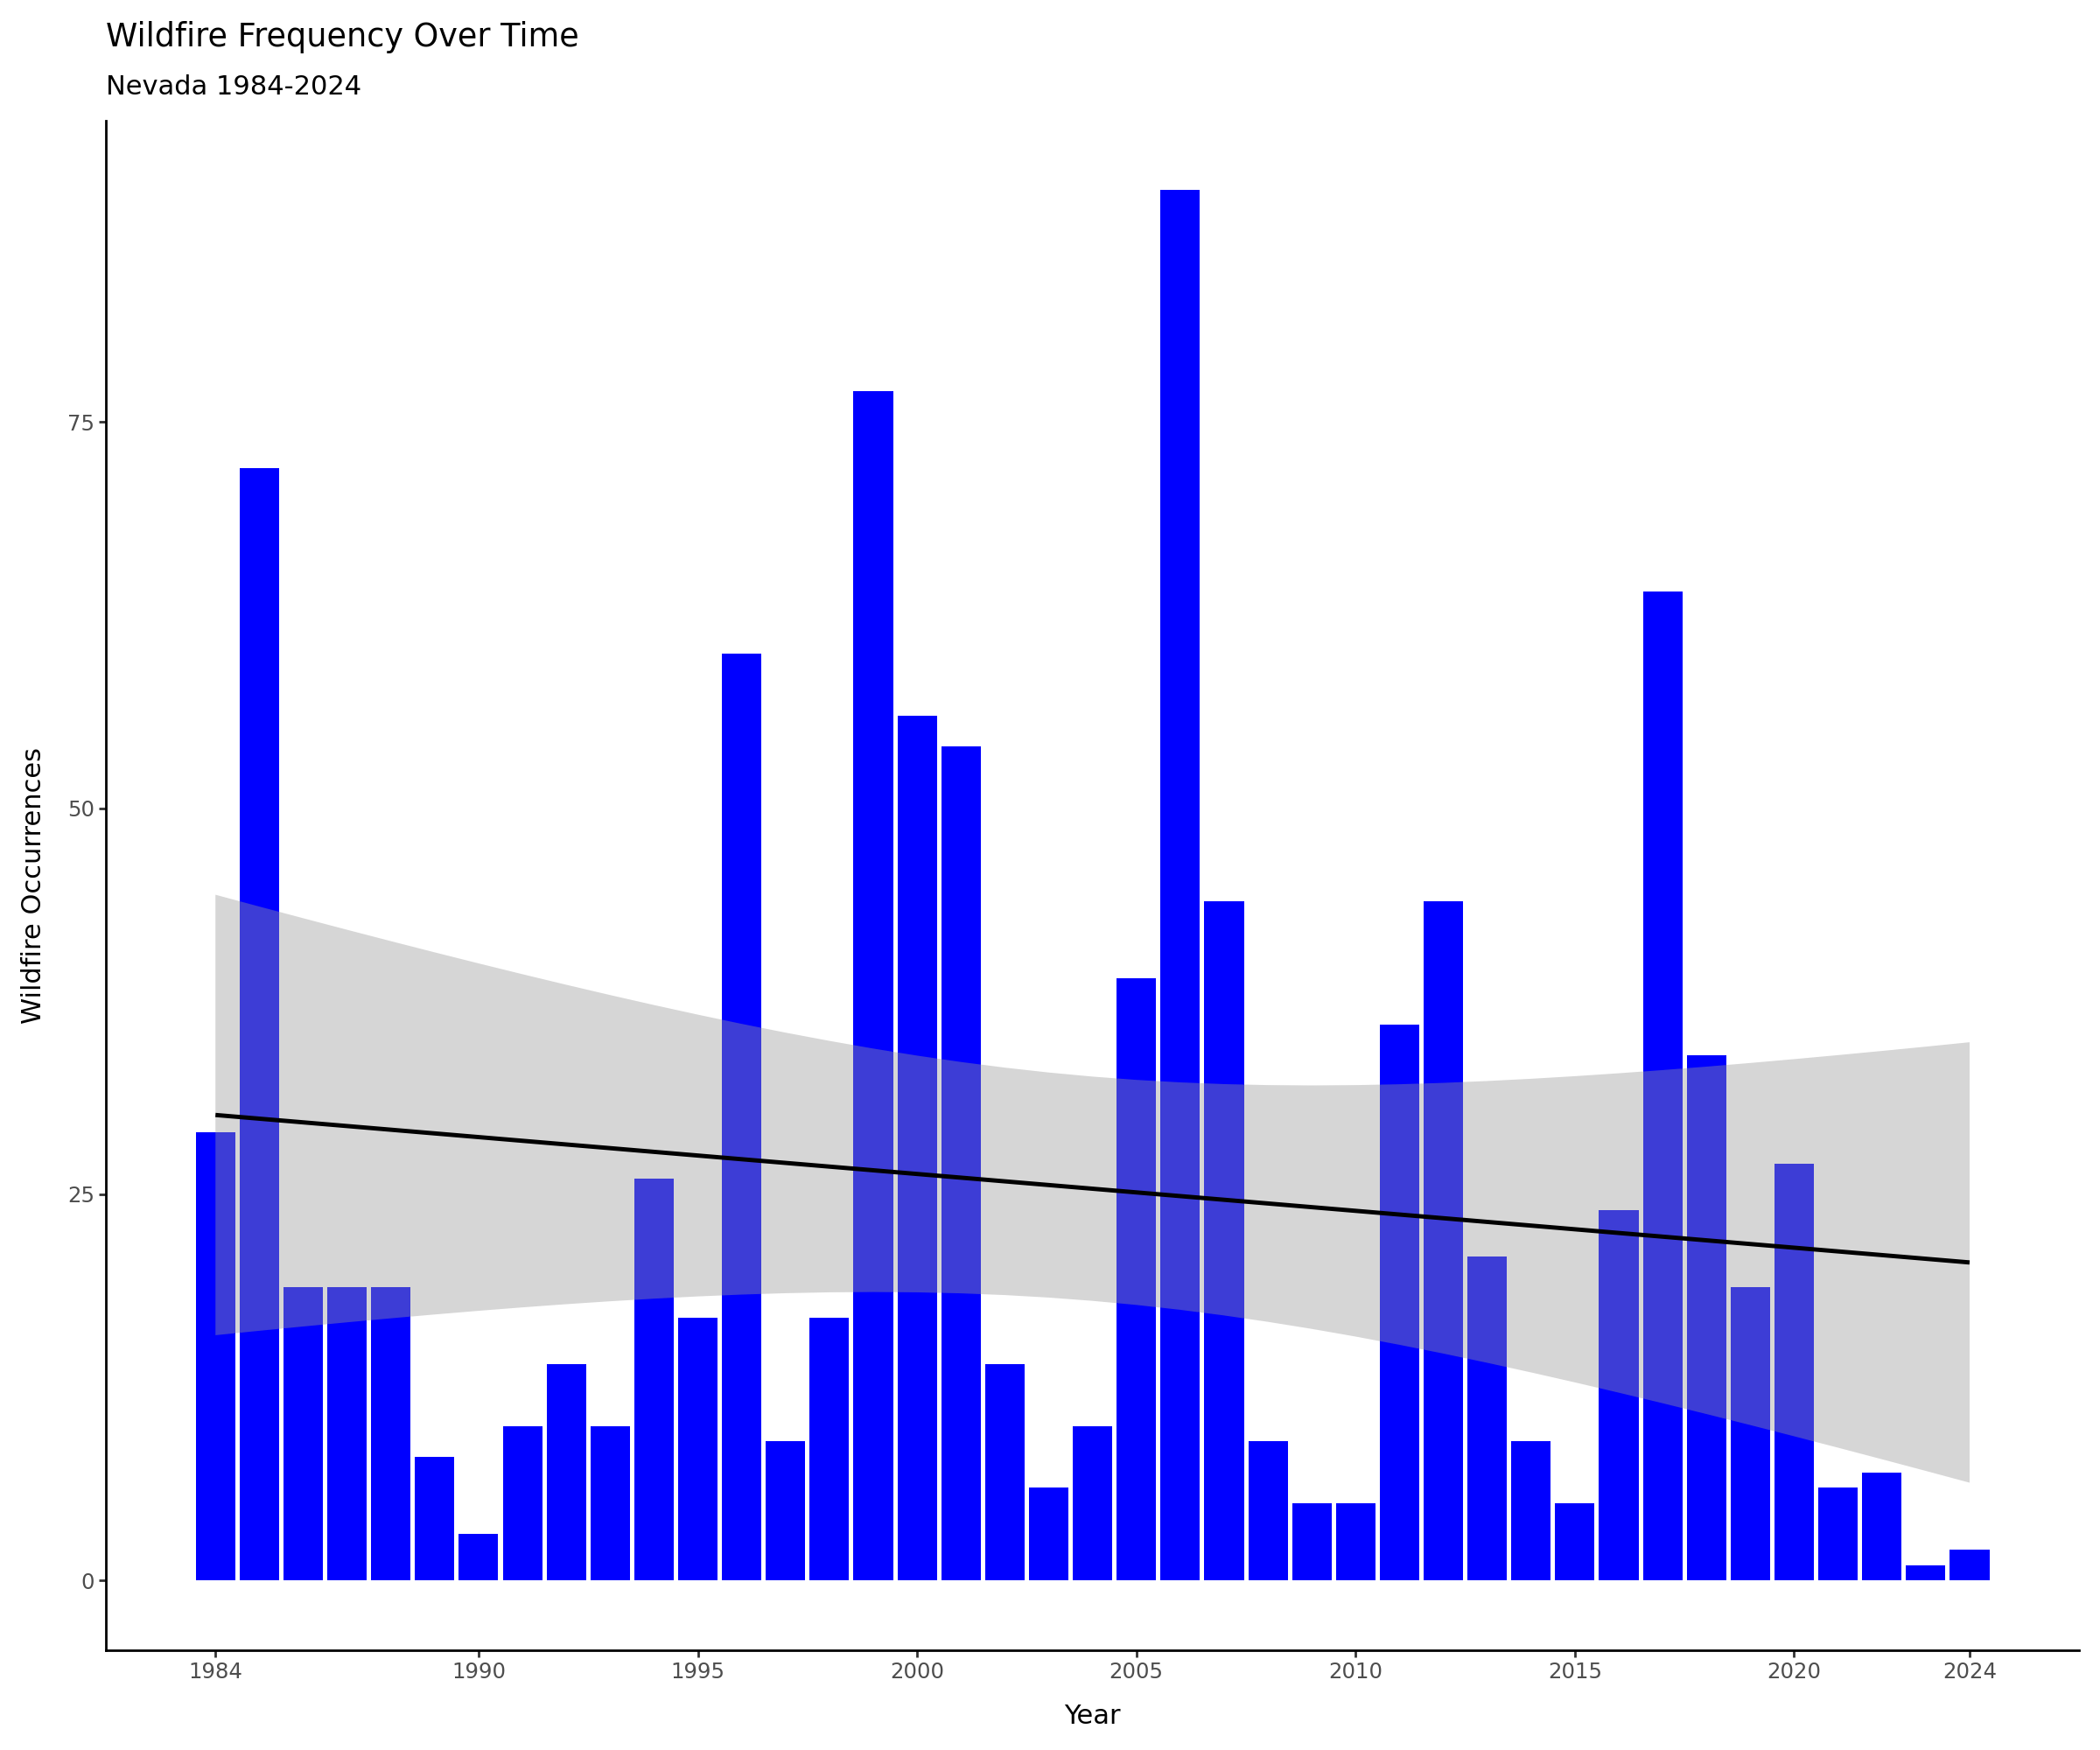

In [75]:
(
    ggplot(NV_df_years, aes(x = 'Year', y='Wildfires'))
       + geom_bar(stat = 'identity', fill = 'blue')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Wildfire Occurrences")
       + ggtitle("Wildfire Frequency Over Time")
       + labs (subtitle="Nevada 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + theme_classic()

)

Nevada Wildfire Size

In [63]:
NV_df_acres = NV_df.pivot_table(index = 'Year', values = 'BurnBndAc', aggfunc = 'sum')
NV_df_acres['BurnBndAc'] = NV_df_acres['BurnBndAc'].astype(int)
NV_df_acres['BurnBndAc'] = NV_df_acres['BurnBndAc'] / 1000000
NV_df_acres = NV_df_acres.reset_index()
NV_df_acres.head()

Year  BurnBndAc
0  1984   0.218695
1  1985   0.816311
2  1986   0.101973
3  1987   0.073576
4  1988   0.085713

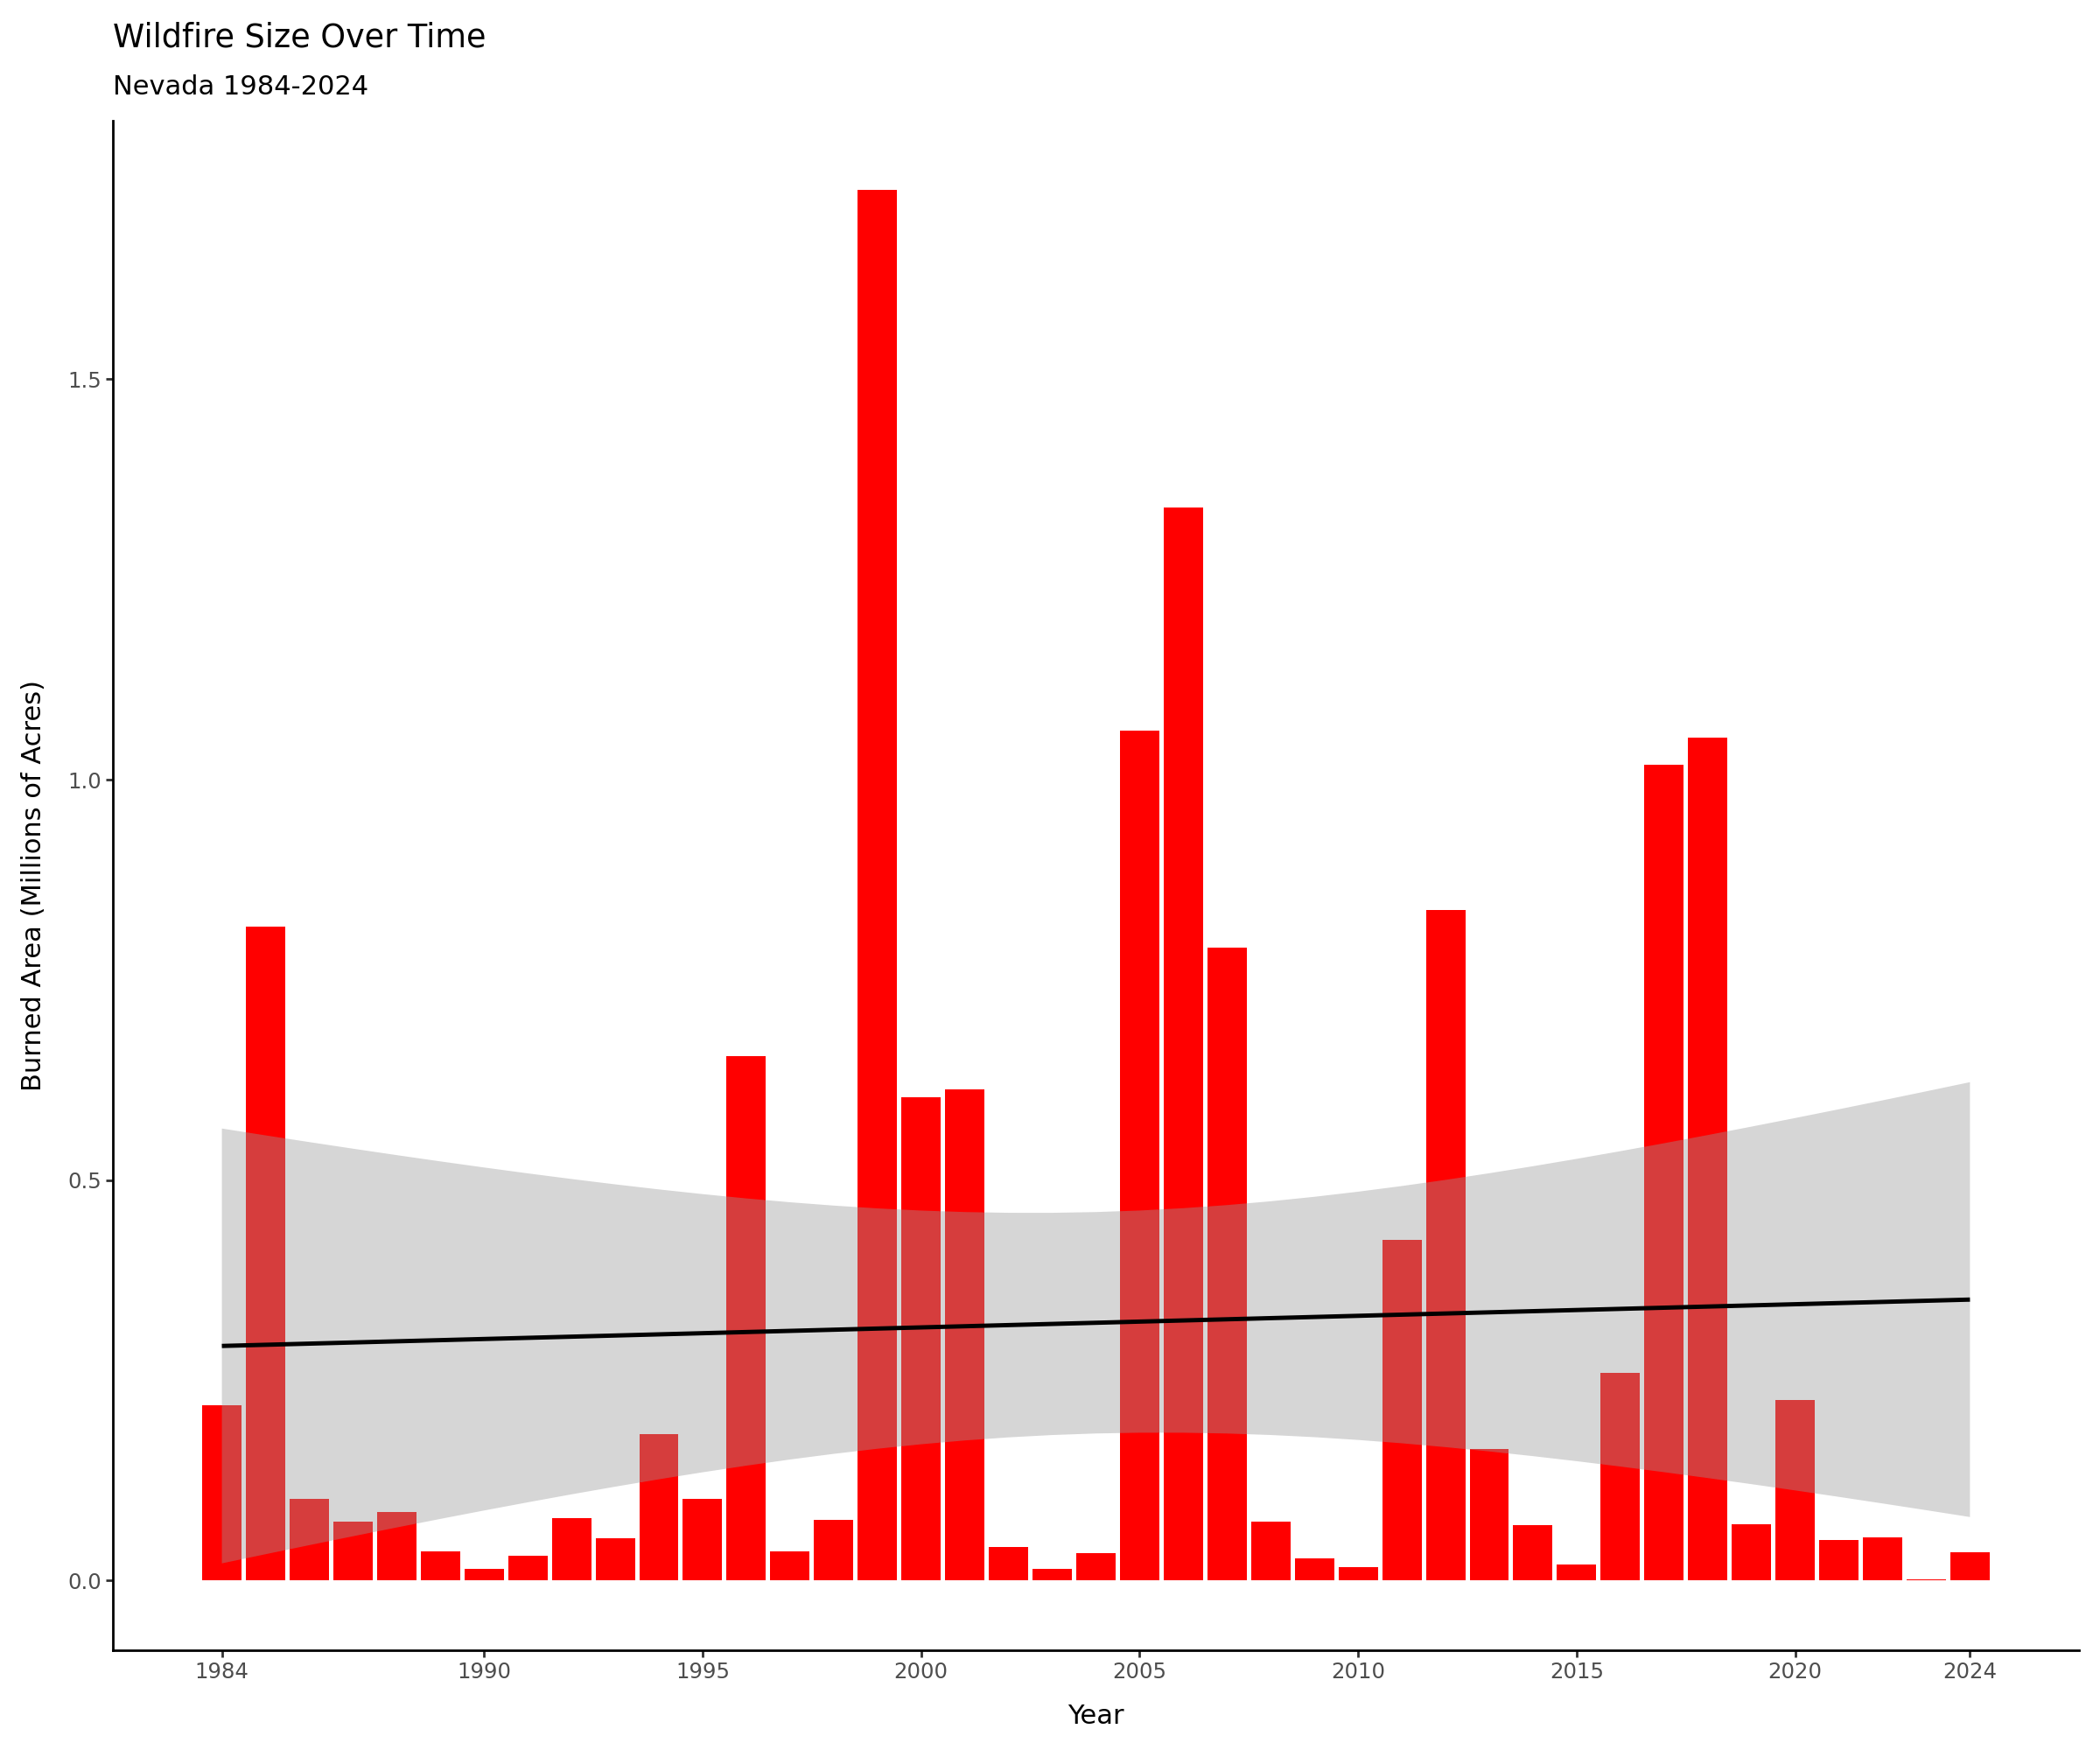

In [76]:
# fire size over time
(
    ggplot(NV_df_acres, aes(x = 'Year', y='BurnBndAc'))
       + geom_bar(stat = 'identity', fill = 'red')
       + geom_smooth(method='lm')
       + xlab("Year")
       + ylab("Burned Area (Millions of Acres)")
       + ggtitle("Wildfire Size Over Time")
       + labs (subtitle="Nevada 1984-2024")
       + scale_x_continuous(breaks = [1984, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024])
       + scale_y_continuous()
       + theme_classic()
)

#Create State Animation

To visualize how fire placement has changed over time and practice some new Python skills, we create a GIF presenting each year of California's wildfire coverage.

In [65]:
#define years for animation
years = sorted(df_wildfires['Year'].unique())

In [66]:
#Define animation constants
OUTPUT_DIR = "frames" #create directory to hold frames
CA_GIF = "map_animation.gif" #create final output file
FIG_WIDTH = 10 #set standard size for each animation frame
FIG_HEIGHT = 8 #set standard size for each animation frame
DPI = 100 #set standard resolution
FPS = 2 #set frames per second

In [67]:
#create CA frame boundary
min_x, min_y, max_x, max_y = california.total_bounds

#create 5% buffer around frame to avoid cutoff
buffer_x = (max_x - min_x) * 0.05
buffer_y = (max_y - min_y) * 0.05

#extend CA frame boundary using buffer
min_x -= buffer_x
min_y -= buffer_y
max_x += buffer_x
max_y += buffer_y

In [68]:
#create a png for each year

frame_paths = [] #create empty vector to fill

if not os.path.exists(OUTPUT_DIR): #make output directory for each frame
    os.makedirs(OUTPUT_DIR)

for year in years: #create frame for individual year
    frame_path = os.path.join(OUTPUT_DIR, f"frame_{year}.png") # create filenames
    frame_paths.append(frame_path) # add each new frame to vector

    # Generate plot for year
    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
    year_df = CA_df[CA_df['Year'] == year]

    # Add California boundaries
    california.boundary.plot(ax=ax, color='#e6e6e6', linewidth=1) #plot boundary
    california.plot(ax=ax, color='lightgray', alpha=0.5) # fill with light gray

    # Plot the data if there is any for this year
    if not year_df.empty:
        year_df.plot(column='Year', ax=ax,
                    cmap=plt.cm.RdYlGn_r,
                    vmin=1984, vmax=2024,
                    edgecolor='#FF000000',
                    legend=True)

    ax.set_xlim(min_x, max_x) #set defined axis limits with buffer
    ax.set_ylim(min_y, max_y) #set defined axis limits with buffer

    ax.set_title(f'Year: {year}', fontsize=14)      # Set dynamic title
    ax.axis('off')                                  # Remove axes
    plt.tight_layout()

    # Save to file
    plt.savefig(frame_path, dpi=DPI)
    plt.close(fig)

<ipython-input-69-30df5fd3e10c>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


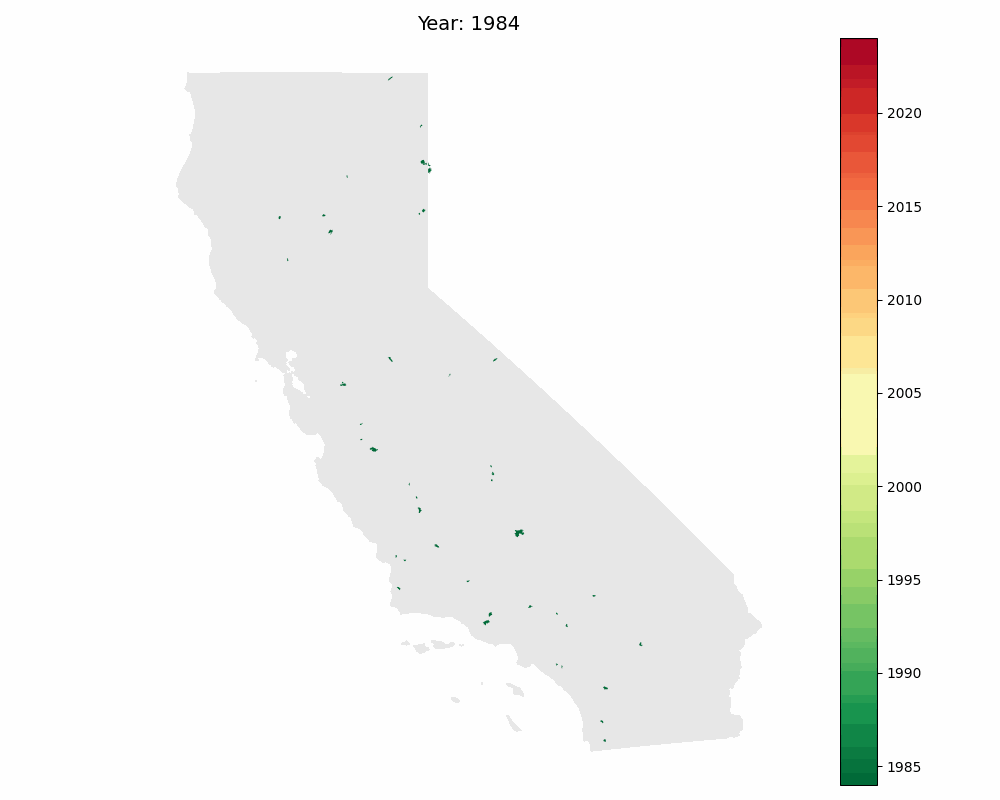

In [69]:
#combine yearly pngs into gif using imageio

images = []
for path in frame_paths:
    images.append(imageio.imread(path))

imageio.mimsave(CA_GIF, images, fps=FPS) #fill CA_GIF with set of images

display(Image(filename=CA_GIF)) #show gif

#Track Burn Severity

Our main issue is that the DNBr value for each fire is not coded into a data frame, instead, it is stored via pixel color in a tif file. The tif files for the CONUS are too large to process in Colab, so we created a focused attempt for California to lay out how analysis of this data could work

In [80]:
#load in all tif files for CA 2010-2024
for year in range(2010, 2024):
    url = f"https://github.com/envirodatascience/final-project-wildfire/raw/main/mtbs_CA_{year}.tif"
    !wget {url}

--2025-04-28 14:55:35--  https://github.com/envirodatascience/final-project-wildfire/raw/main/mtbs_CA_2010.tif
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/final-project-wildfire/main/mtbs_CA_2010.tif [following]
--2025-04-28 14:55:35--  https://raw.githubusercontent.com/envirodatascience/final-project-wildfire/main/mtbs_CA_2010.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7612876 (7.3M) [image/tiff]
Saving to: ‘mtbs_CA_2010.tif.2’

mtbs_CA_2010.tif.2  100%[===================>]   7.26M  --.-KB/s    in 0.08s   

2025-04-28 14:55:35 (89.6 MB/s) - ‘mtbs_CA_2010.tif.2’ s

In [82]:
# Define the target RGB colors
target_colors = {
    "High": [255, 0, 0],
    "Moderate": [255, 255, 0],
    "Low": [127, 255, 212],
    "Unburned": [0, 100, 0],}

In [83]:
#Create list to store the data for each year
data = []

In [84]:
# Loop through the years
for year in range(2010, 2024):  # Adjust the year range as needed
    file_name = f"mtbs_CA_{year}.tif.1" #generate file name relative to year
    image = cv2.imread(file_name) #load in image a little smaller

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert image to RGB colors
    color_counts = {'Year': year} # initialize a dictionary to store the pixel counts for this year

    # Count matching pixels for each color
    for name, rgb in target_colors.items():
        mask = np.all(image_rgb == rgb, axis=-1)
        count = np.sum(mask)
        color_counts[name] = count

    # Append the result to the data list
    data.append(color_counts)

In [85]:
CA_severe = pd.DataFrame(data) #fill into dataframe
CA_severe.head()

Year    High  Moderate      Low  Unburned
0  2010   35932    137021   169916     95332
1  2011   28068    107092   431433     71496
2  2012  434460    880207  1626108    440666
3  2013  493869    781860   878481    381346
4  2014  714116    730620   768040    284918

In [86]:
#Create long dataset for figures
CA_severe_long = CA_severe.melt(id_vars=["Year"], value_vars=["High", "Moderate", "Low", "Unburned"],
                  var_name="Category", value_name="Pixel Count")
CA_severe_long.head()

Year Category  Pixel Count
0  2010     High        35932
1  2011     High        28068
2  2012     High       434460
3  2013     High       493869
4  2014     High       714116

In [87]:
#Define colors for figures to match coloring on Tif
figure_colors = {
    "High": "#FF0000",
    "Moderate": "#FFFF00",
    "Low": "#7FFFD4",
    "Unburned": "#006400"
}

In [88]:
#set order of appearance for each category
category_order = ["High", "Moderate", "Low", "Unburned"]
CA_severe_long['Category'] = pd.Categorical(CA_severe_long['Category'], categories=category_order, ordered=True)

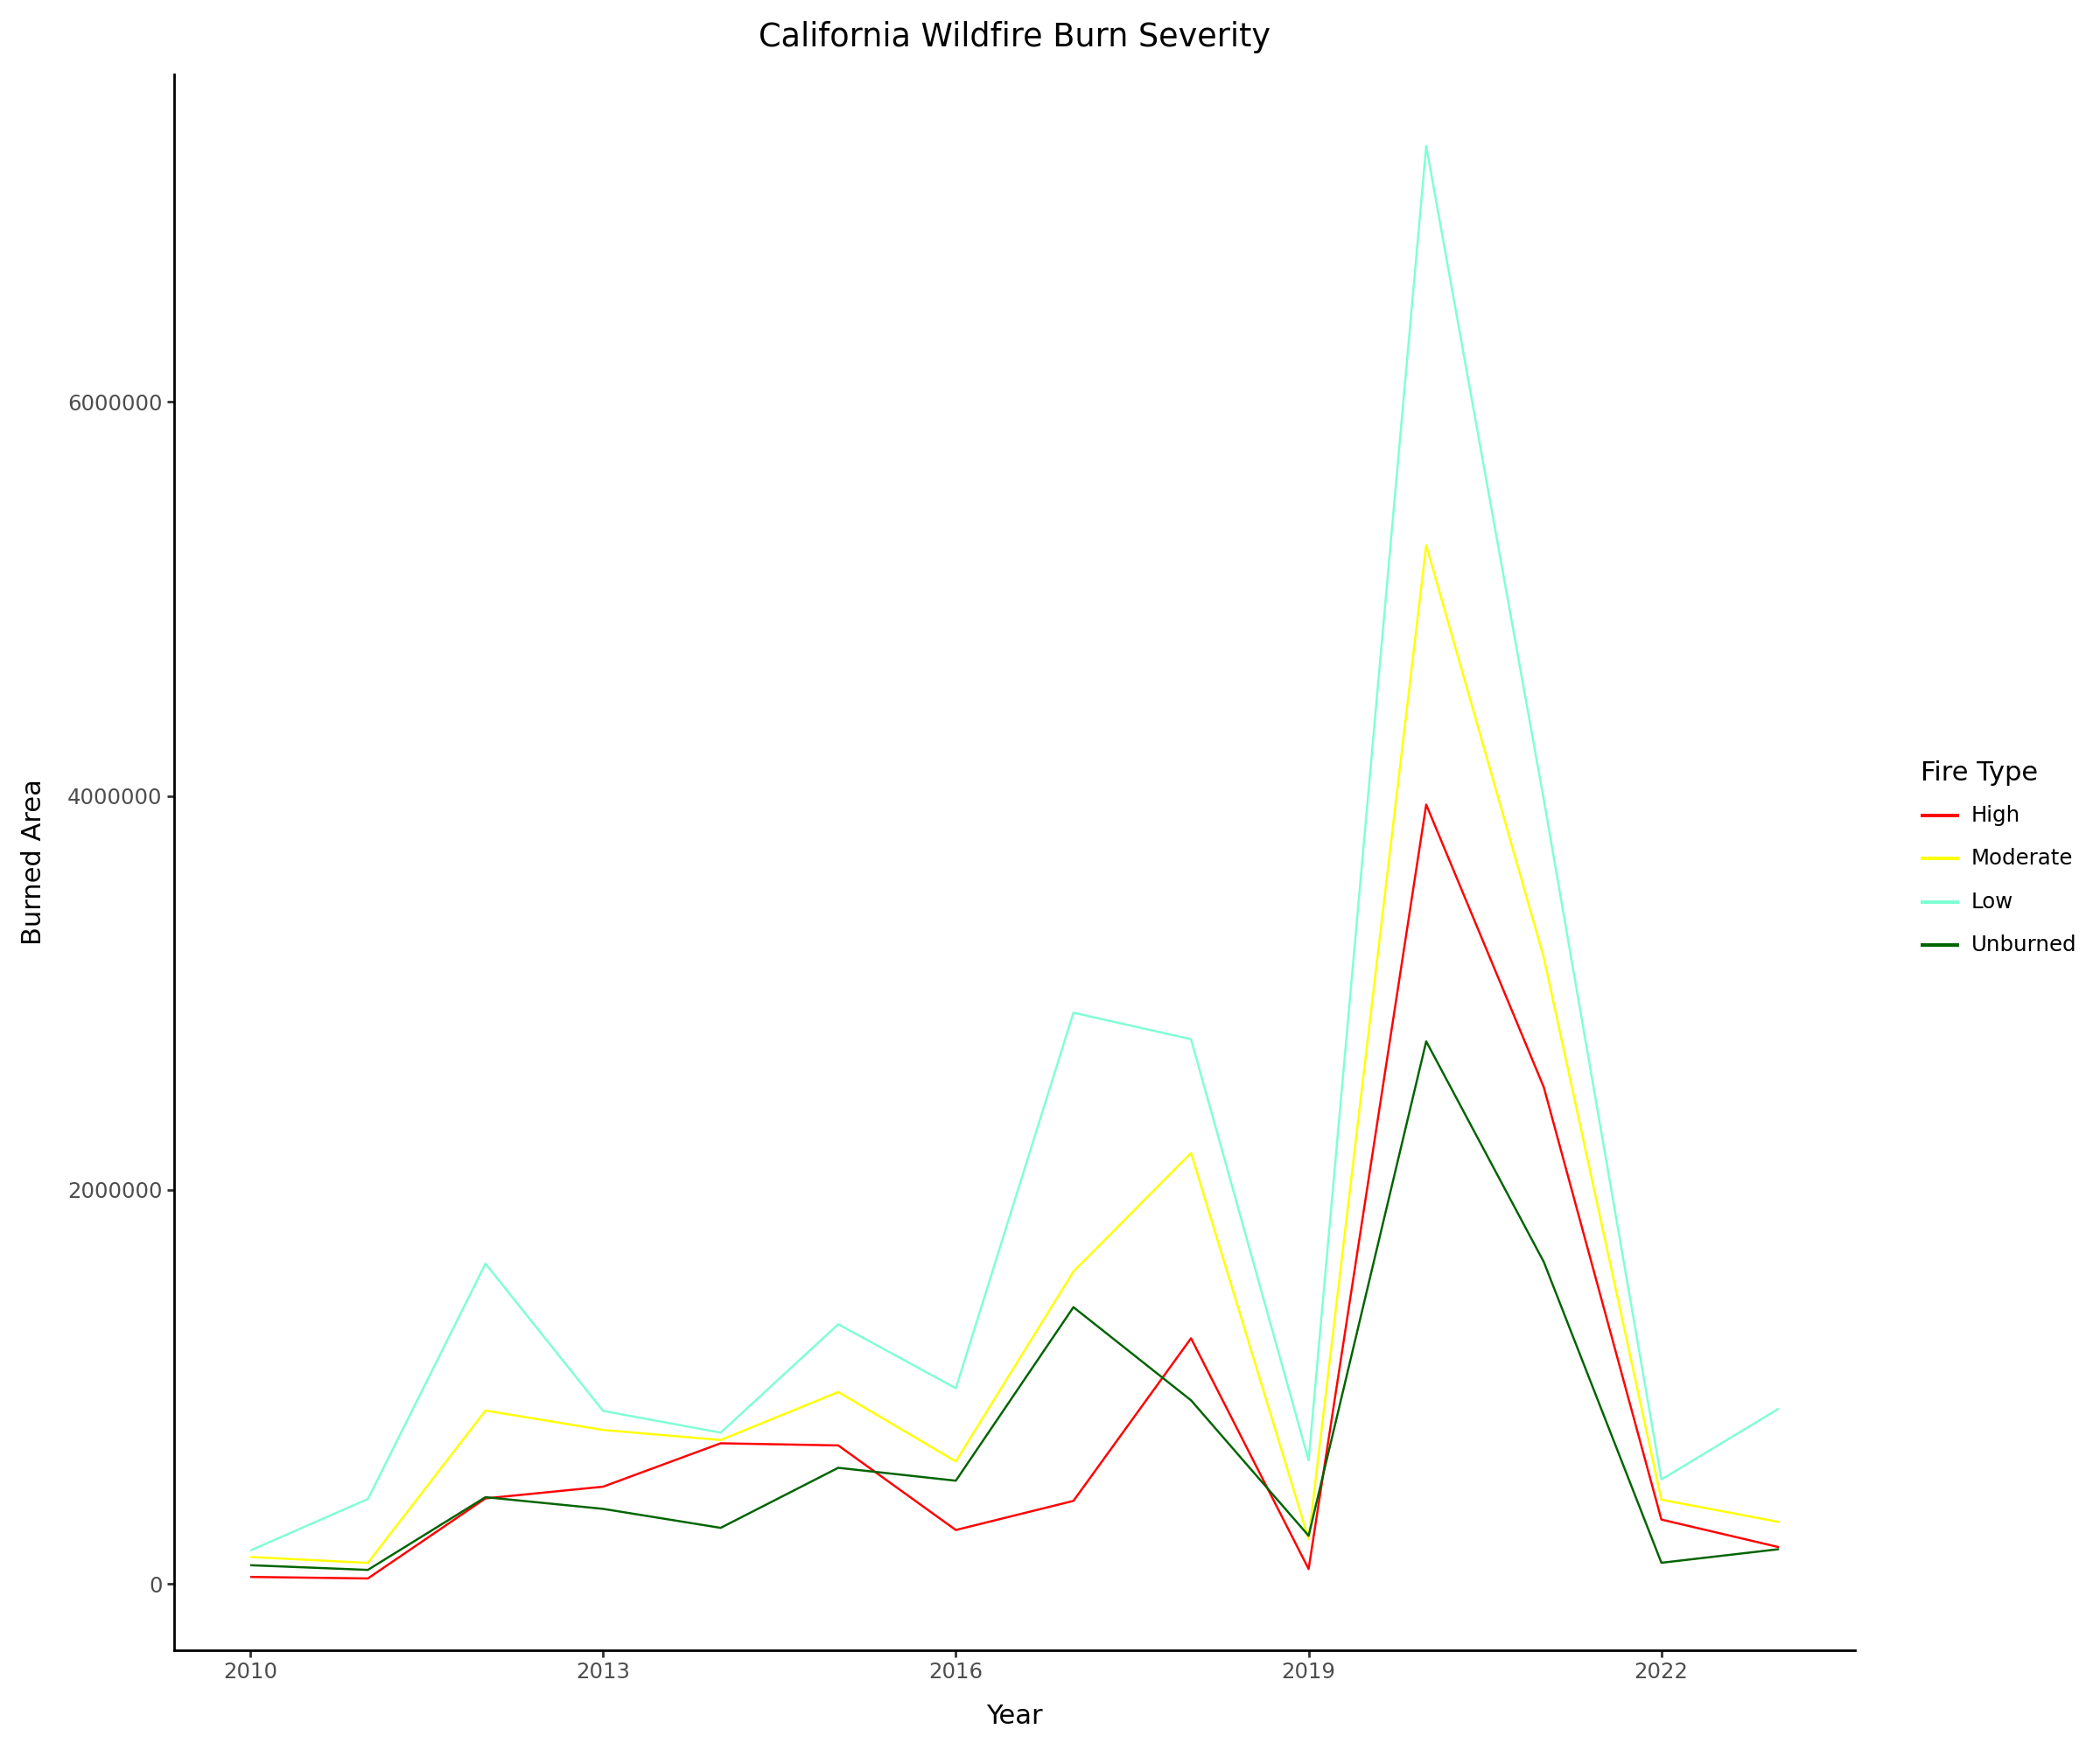

In [89]:
(
    ggplot(CA_severe_long, aes(x = 'Year', y = 'Pixel Count', color = 'Category'))
    + geom_line()
    + scale_color_manual(values = figure_colors)
    + xlab("Year")
    + ylab("Burned Area")
    + labs(color = 'Fire Type')
    + ggtitle("California Wildfire Burn Severity")
    + scale_x_continuous(breaks = [2010, 2013, 2016, 2019, 2022])
    + theme_classic()
)

In [90]:
#create columns for 100% bar chart
CA_severe_long['Total'] = CA_severe_long.groupby('Year')['Pixel Count'].transform('sum')
CA_severe_long['Percentage'] = CA_severe_long['Pixel Count'] / CA_severe_long['Total'] * 100

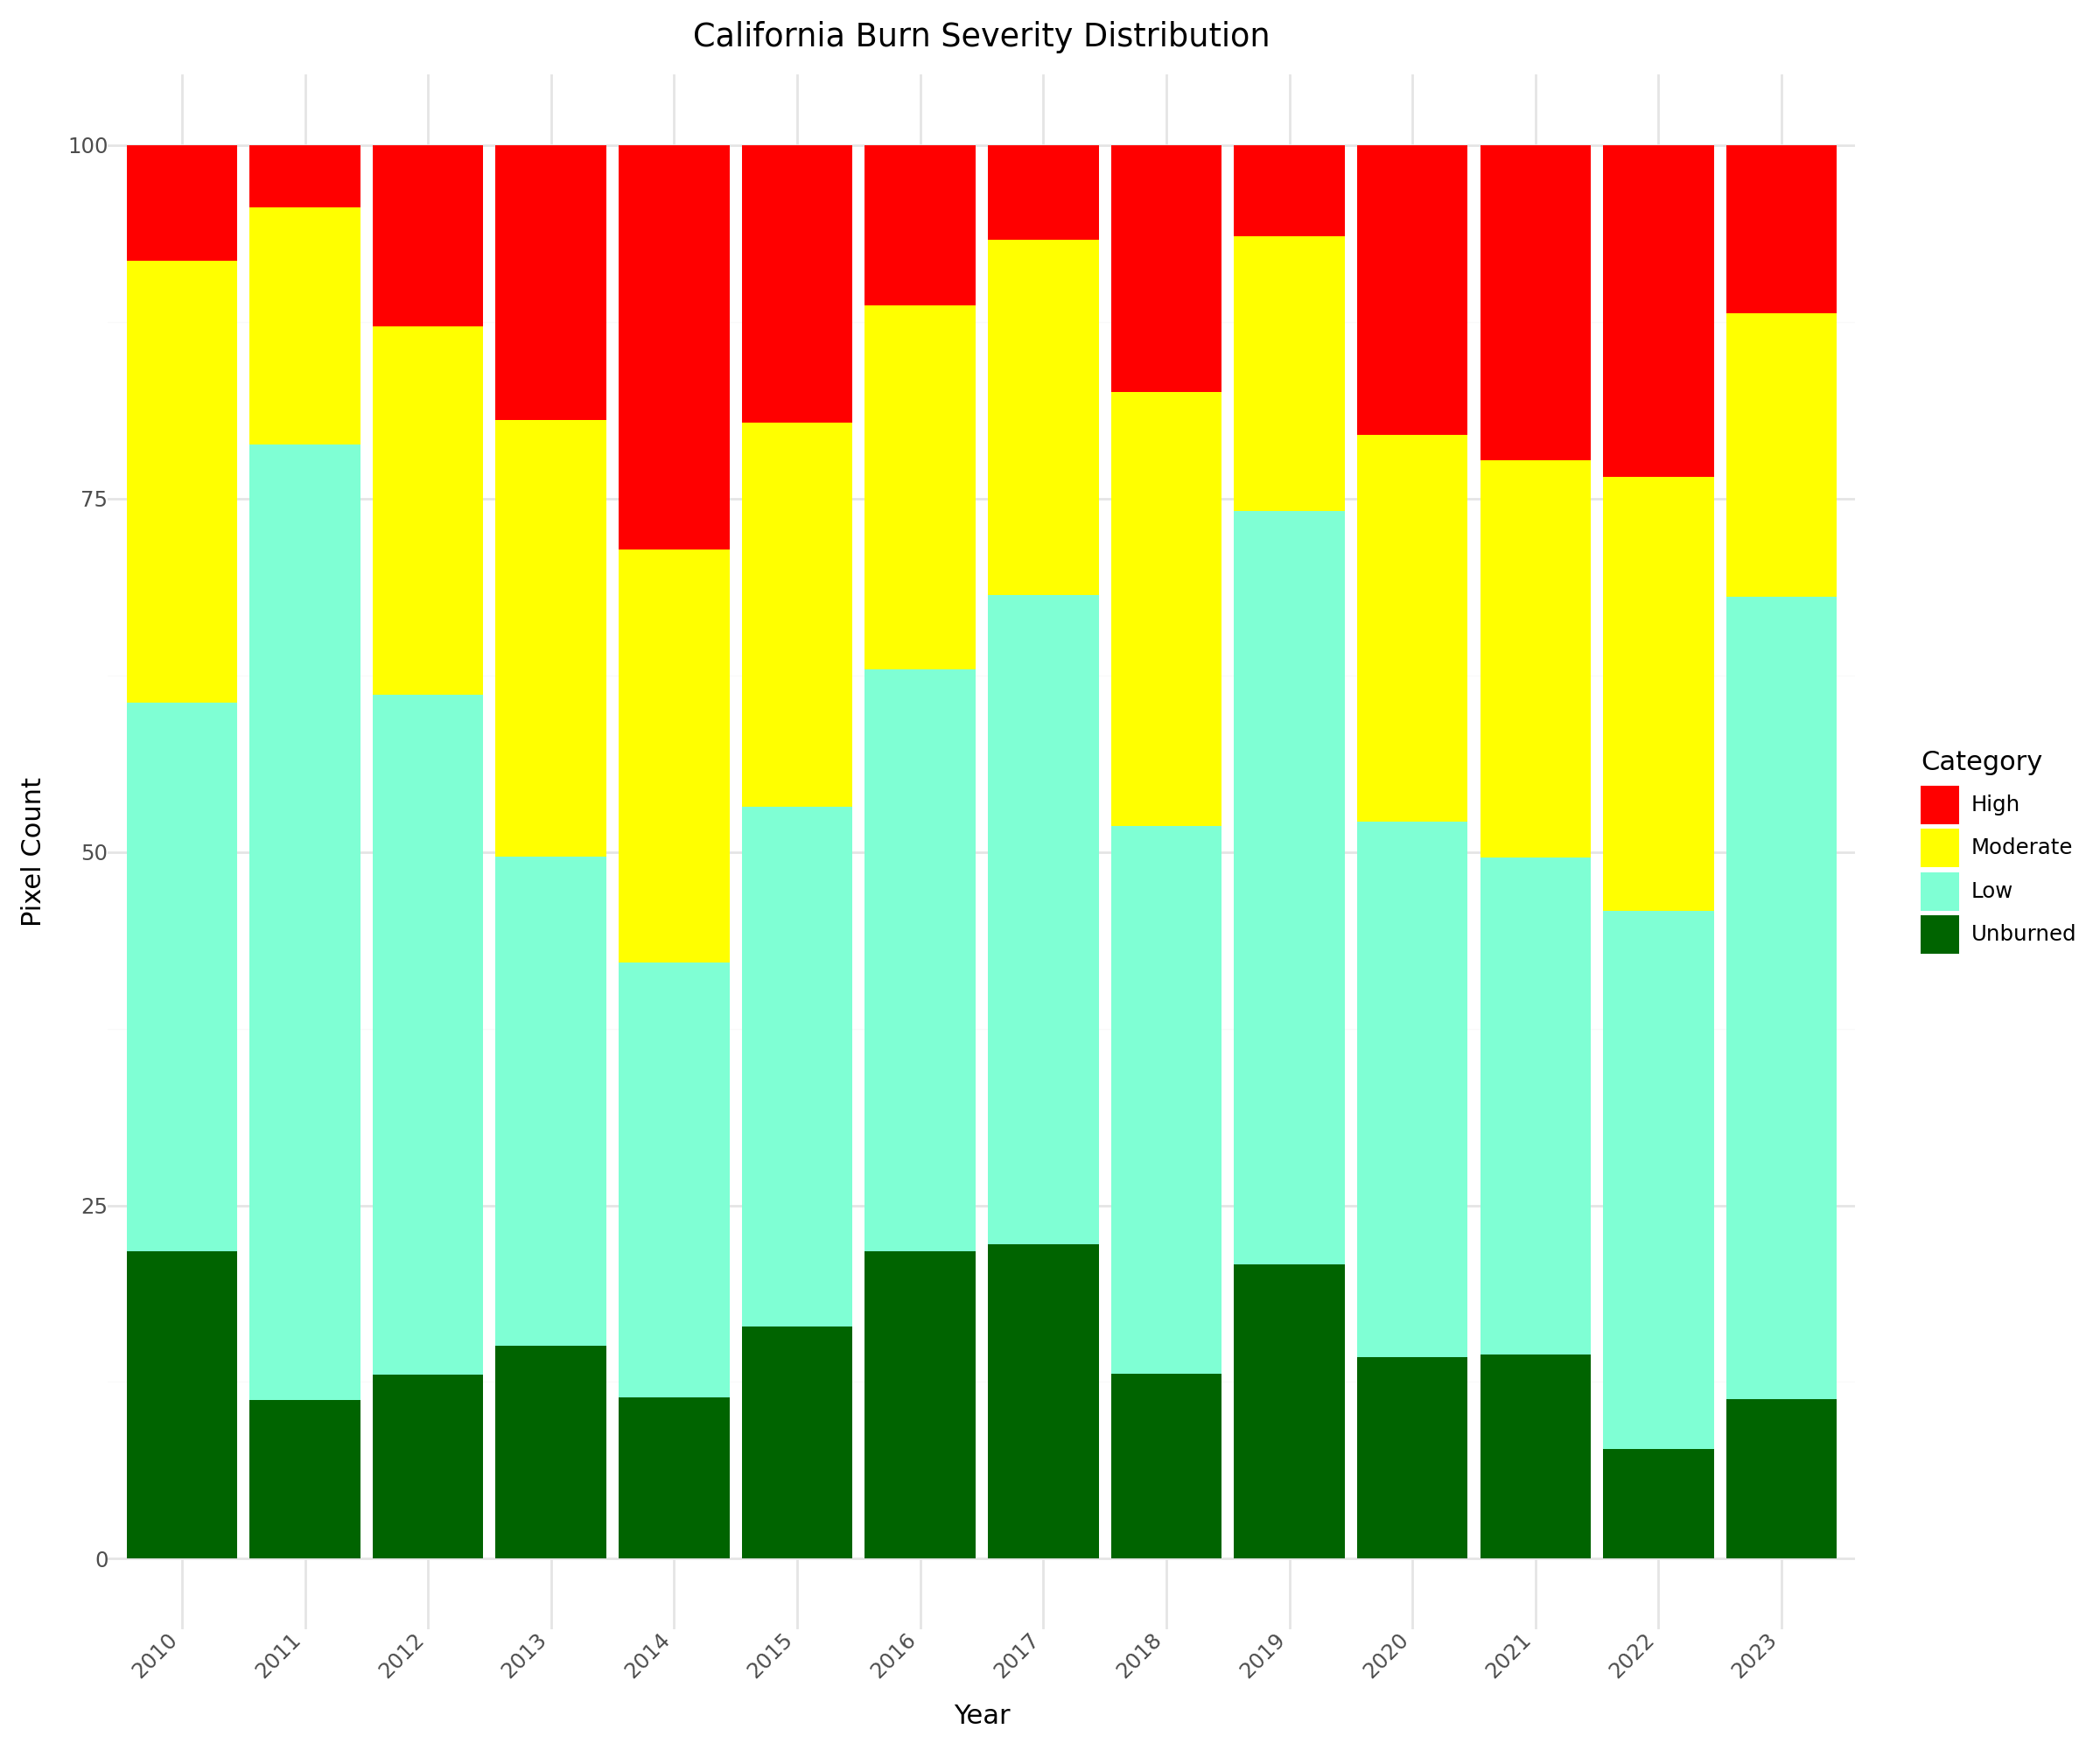

In [93]:
(ggplot(CA_severe_long, aes(x='factor(Year)', y='Percentage', fill='Category'))
+ geom_bar(stat='identity')
+ scale_fill_manual(values=figure_colors)
+ labs(x="Year", y="Pixel Count", title="California Burn Severity Distribution")
+ theme_minimal()
+ theme(axis_text_x=element_text(angle=45, hjust=1)))